# **Importing Required Modules**

In [0]:
# -*- coding: utf-8 -*-
# !pip install librosa
# import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
# from librosa import display
# from librosa import feature 
import re

# **Data Preprocessing**

In [0]:
#Train CSV File
train_dataset=pd.read_csv('train.csv')
train_audio=pd.read_csv('train_audio_datas_mcfcc.csv')
test_dataset=pd.read_csv('test.csv')
test_audio=pd.read_csv('test_audio_datas_mcfcc.csv')


# Extracting Features from audio file

In [0]:
#Extracting Features for training set
train_audio={}
for filename in os.listdir(os.getcwd()+"\\Train\\"):
#    print(filename)
    audio_data,sampling_rate=librosa.load('D:/studies/Python/Machine_learning/Analytics vidya Urban Sound Classification/Train/'+str(filename))
    audio_data=feature.mfcc(audio_data,sr=sampling_rate,n_mfcc=40).T
    audio_data=np.mean(audio_data,axis=0)
    audio_id=re.sub('[^0-9]','',filename)
    audio_id=int(audio_id)
    train_audio[audio_id]=audio_data
#    train_audio.append(audio_data)



In [0]:
#Visualizing the extracted training set features
plt.plot(train_audio[0])
plt.show()

In [0]:
#Saving the extracted training set features to csv file.
train_audio2=pd.DataFrame.from_dict(train_audio,orient='index')
train_audio2.to_csv('train_audio_datas_mcfcc.csv')

In [0]:
#Extracting Features for testing set
test_audio={}
for filename in os.listdir(os.getcwd()+"\\Test\\"):
#    print(filename)
    audio_data,sampling_rate=librosa.load('D:/studies/Python/Machine_learning/Analytics vidya Urban Sound Classification/Test/'+str(filename))
    audio_data=feature.mfcc(audio_data,sr=sampling_rate,n_mfcc=40).T
    audio_data=np.mean(audio_data,axis=0)
    audio_id=re.sub('[^0-9]','',filename)
    audio_id=int(audio_id)
    test_audio[audio_id]=audio_data
#    train_audio.append(audio_data)



In [0]:
#Visualizing the extracted testing set features
plt.plot(test_audio[0])
plt.show()

In [0]:
#Saving the extracted testing set features to csv file.
test_audio1=pd.DataFrame.from_dict(test_audio,orient='index')
test_audio1.to_csv('test_audio_datas_mcfcc.csv')

In [0]:
#preparing the training dataset by combining the target label with the respective audio features 
train_audio=train_audio.set_index('Unnamed: 0')
train_dataset=train_dataset.set_index('ID')
training_set=train_dataset.join(train_audio)

In [11]:
training_set.head(10)

,Class,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
ID,,,,,,,,,,,,,,,,,,,,,
0,siren,-75.111250,129.589251,-32.655625,15.267829,-2.360632,14.610705,-3.743910,17.954970,-1.990753,...,-3.163051,1.887719,-3.316651,0.821205,-2.874883,1.389857,-1.047763,1.232151,-4.353468,0.712385
1,street_music,-8.294553,113.578895,-19.074821,29.321666,-13.685432,7.119629,-12.766894,8.072384,-9.090841,...,6.184152,9.267892,-0.401901,1.535517,-3.486720,-1.790176,-7.049877,2.215843,0.336268,1.088470
2,drilling,-115.240077,3.663259,-38.719258,-4.017874,-15.980865,-11.162937,1.781204,4.008844,-2.439703,...,-2.849892,3.791634,-4.487168,5.783754,-5.079717,2.137287,-4.168344,1.880081,-4.328229,3.600879
3,siren,-211.894774,87.235496,-53.263078,10.795215,-46.011216,13.146881,20.342806,14.811536,0.557566,...,11.743966,-4.606264,-5.376324,1.271255,-2.416471,5.936846,1.078044,7.571184,-1.883665,-14.887664
4,dog_bark,-235.848273,132.933084,42.145292,18.444549,12.180267,11.440745,-1.700809,10.446819,-0.801511,...,-0.229552,0.423207,-0.163844,0.157876,1.103198,1.711443,2.182521,2.726957,0.101851,1.197539
6,children_playing,-245.401495,120.938752,-40.669425,18.938190,-20.298984,7.603047,1.584437,-0.015048,12.475678,...,-3.062915,-0.628557,-2.223328,0.595142,-5.545740,-0.860117,-3.004450,-3.108566,-5.336440,-2.041737
10,street_music,-197.073649,74.203192,-57.101904,9.147130,-11.491060,-6.785070,2.142802,7.952377,0.277638,...,-1.365861,5.983876,-7.402787,5.810218,-1.242829,1.609561,0.472233,-5.546378,0.022408,5.466412
11,drilling,-46.839426,10.663452,-34.120968,-2.763582,-18.380384,11.039756,-11.952973,-9.231555,-13.734537,...,-3.041674,-0.597478,-9.561778,-2.056333,-3.167224,5.449465,-1.514126,3.992029,4.496976,6.692579
12,gun_shot,-109.121170,89.648596,-135.839154,55.512907,-41.052009,16.918187,-30.601042,6.812130,-15.437514,...,-1.404374,4.295936,-3.822756,3.492969,-2.653462,3.313766,-2.090727,2.059682,0.081403,0.202555


In [0]:
#Saving the training dataset to csv file
training_set.to_csv('train_dataset.csv')

In [0]:
#preparing the testing dataset by combining the index with the respective audio features 
test_audio=test_audio.set_index('Unnamed: 0')
test_dataset=test_dataset.set_index('ID')
testing_set=test_dataset.join(test_audio)

In [0]:
#Saving the testing dataset to csv file
testing_set.to_csv('test_dataset.csv')

# **Spliting the Dataset into Training and Testing set**

In [0]:
x_train=training_set.iloc[:,1:].values
y_train=training_set.iloc[:,0].values
x_test=testing_set.iloc[:,0:].values
y_test=testing_set.index.values

# **Feature Scaling**

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

# **Label Encoding**

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_train=labelencoder.fit_transform(y_train)

# **Categorical Function**

In [0]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)

In [71]:
x_train.shape

(5435, 40)

In [72]:
y_train.shape

(5435, 10)

# **Model Training**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [111]:
classifier=Sequential()


#intializing with hidden and input layer
classifier.add(Dense(units=64,activation='relu',input_dim=40))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dropout(rate=0.2))

classifier.add(Dense(units=26,activation='relu'))
classifier.add(Dropout(rate=0.2))
            
#Output Layer
classifier.add(Dense(units=10,activation='softmax'))
               
#compilation
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model=classifier.fit(x_train,y_train,epochs=100,batch_size=12,validation_split=0.2)
              
      


Train on 4348 samples, validate on 1087 samples
Epoch 1/100
4348/4348 [==============================] - 1s 305us/step - loss: 2.0937 - acc: 0.2433 - val_loss: 1.7109 - val_acc: 0.4333
Epoch 2/100
4348/4348 [==============================] - 1s 182us/step - loss: 1.6377 - acc: 0.4299 - val_loss: 1.3106 - val_acc: 0.6155
Epoch 3/100
4348/4348 [==============================] - 1s 183us/step - loss: 1.3841 - acc: 0.5193 - val_loss: 1.1414 - val_acc: 0.6467
Epoch 4/100
4348/4348 [==============================] - 1s 181us/step - loss: 1.2609 - acc: 0.5713 - val_loss: 1.0175 - val_acc: 0.6734
Epoch 5/100
4348/4348 [==============================] - 1s 182us/step - loss: 1.1717 - acc: 0.6044 - val_loss: 0.9472 - val_acc: 0.7121
Epoch 6/100
4348/4348 [==============================] - 1s 182us/step - loss: 1.1055 - acc: 0.6309 - val_loss: 0.9008 - val_acc: 0.7213
Epoch 7/100
4348/4348 [==============================] - 1s 180us/step - loss: 1.0690 - acc: 0.6396 - val_loss: 0.8576 - val_acc: 

1848/4348 [===========>..................] - ETA: 0s - loss: 0.4529 - acc: 0.85394348/4348 [==============================] - 1s 185us/step - loss: 0.4798 - acc: 0.8431 - val_loss: 0.4855 - val_acc: 0.8546
Epoch 65/100
4348/4348 [==============================] - 1s 185us/step - loss: 0.4592 - acc: 0.8507 - val_loss: 0.4943 - val_acc: 0.8556
Epoch 66/100
4348/4348 [==============================] - 1s 186us/step - loss: 0.4933 - acc: 0.8356 - val_loss: 0.5020 - val_acc: 0.8592
Epoch 67/100
4348/4348 [==============================] - 1s 188us/step - loss: 0.4779 - acc: 0.8429 - val_loss: 0.5038 - val_acc: 0.8537
Epoch 68/100
4348/4348 [==============================] - 1s 188us/step - loss: 0.4665 - acc: 0.8503 - val_loss: 0.4965 - val_acc: 0.8583
Epoch 69/100
4348/4348 [==============================] - 1s 193us/step - loss: 0.4682 - acc: 0.8484 - val_loss: 0.5014 - val_acc: 0.8528
Epoch 70/100
4348/4348 [==============================] - 1s 193us/step - loss: 0.4650 - acc: 0.8519 - v

# **Visualizing the Model Performance**

In [158]:
print(model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


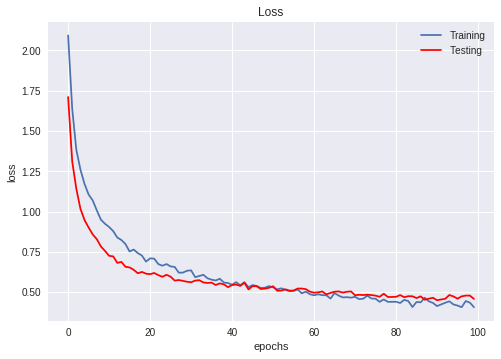

In [113]:
#visualizing the model Performance

plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'],c='red')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training','Testing'])
plt.show()


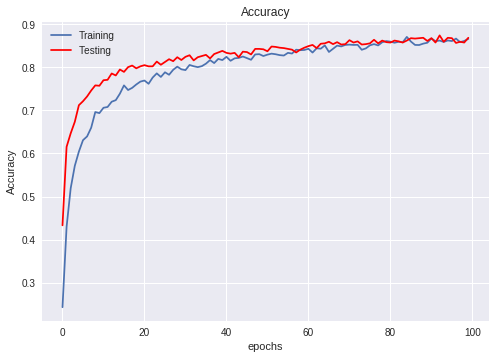

In [114]:
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'],c='red')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Testing'])
plt.show()

# **Prediction**

In [0]:
y_pred=classifier.predict(x_test)

In [0]:
#inverting to_categorical to vector of values
y_pred=[np.argmax(y_pred[i]) for i in range(len(y_pred))]
y_pred=np.array(y_pred)

# **Confusion Matrix**

In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Inverse transforming the predicted values**

In [118]:
y_pred=labelencoder.inverse_transform(y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# **Saving the predicted value to csv**

In [0]:
y_pred=pd.Series(y_pred,index=y_test)
y_pred.to_csv('prediction.csv')

In [0]:
from google.colab import files
files.download('prediction.csv')

# **Hyperparameter Tuning**

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [136]:

def build_classifier(units,optimizer):
  
  classifier=Sequential()

  #intializing with hidden and input layer
  classifier.add(Dense(units=units,activation='relu',input_dim=40))
  classifier.add(Dropout(rate=0.2))
  classifier.add(Dense(units=units,activation='relu'))
  classifier.add(Dropout(rate=0.2))

  classifier.add(Dense(units=units,activation='relu'))
  classifier.add(Dropout(rate=0.2))

  #Output Layer
  classifier.add(Dense(units=10,activation='softmax'))

  #compilation
  classifier.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  
  return classifier

classifier=KerasClassifier(build_fn=build_classifier)
parameters={'batch_size':[12,25],'epochs':[50],'units':[26,32,64],
           'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10)
grid_search=grid_search.fit(x_train,y_train)
best_score=grid_search.best_score_
best_params=grid_search.best_params_

Epoch 1/50
4891/4891 [==============================] - 9s 2ms/step - loss: 2.1880 - acc: 0.2010
Epoch 2/50
4891/4891 [==============================] - 2s 471us/step - loss: 1.7752 - acc: 0.3858
Epoch 3/50
4891/4891 [==============================] - 2s 446us/step - loss: 1.5608 - acc: 0.4543
Epoch 4/50
4891/4891 [==============================] - 2s 425us/step - loss: 1.4611 - acc: 0.4899
Epoch 5/50
4891/4891 [==============================] - 2s 455us/step - loss: 1.3802 - acc: 0.5234
Epoch 6/50
4891/4891 [==============================] - 2s 435us/step - loss: 1.3229 - acc: 0.5441
Epoch 7/50
2076/4891 [===========>..................] - ETA: 1s - loss: 1.2978 - acc: 0.55014891/4891 [==============================] - 2s 416us/step - loss: 1.2862 - acc: 0.5584
Epoch 8/50
4891/4891 [==============================] - 2s 391us/step - loss: 1.2509 - acc: 0.5719
Epoch 9/50
4891/4891 [==============================] - 2s 378us/step - loss: 1.2150 - acc: 0.5956
Epoch 10/50
4891/4891 [=======

1200/4891 [======>.......................] - ETA: 1s - loss: 0.9964 - acc: 0.67504891/4891 [==============================] - 2s 482us/step - loss: 0.9724 - acc: 0.6802
Epoch 25/50
4891/4891 [==============================] - 2s 489us/step - loss: 1.0069 - acc: 0.6606
Epoch 26/50
4891/4891 [==============================] - 2s 481us/step - loss: 0.9525 - acc: 0.6862
Epoch 27/50
4891/4891 [==============================] - 2s 478us/step - loss: 0.9653 - acc: 0.6808
Epoch 28/50
4891/4891 [==============================] - 2s 487us/step - loss: 0.9805 - acc: 0.6786
Epoch 29/50
4891/4891 [==============================] - 2s 451us/step - loss: 0.9593 - acc: 0.6790
Epoch 30/50
1608/4891 [========>.....................] - ETA: 1s - loss: 0.9374 - acc: 0.68414891/4891 [==============================] - 2s 483us/step - loss: 0.9646 - acc: 0.6837
Epoch 31/50
4891/4891 [==============================] - 2s 493us/step - loss: 0.9499 - acc: 0.6851
Epoch 32/50
4891/4891 [===========================

3576/4891 [====================>.........] - ETA: 0s - loss: 0.8973 - acc: 0.69914891/4891 [==============================] - 2s 427us/step - loss: 0.9182 - acc: 0.6964
Epoch 48/50
4891/4891 [==============================] - 2s 409us/step - loss: 0.8972 - acc: 0.7042
Epoch 49/50
4891/4891 [==============================] - 2s 431us/step - loss: 0.9125 - acc: 0.6952
Epoch 50/50
4891/4891 [==============================] - 2s 439us/step - loss: 0.8891 - acc: 0.7048
Epoch 1/50
4891/4891 [==============================] - 9s 2ms/step - loss: 2.1660 - acc: 0.1879
Epoch 2/50
4891/4891 [==============================] - 2s 435us/step - loss: 1.8356 - acc: 0.3535
Epoch 3/50
3072/4891 [=================>............] - ETA: 0s - loss: 1.6462 - acc: 0.41894891/4891 [==============================] - 2s 427us/step - loss: 1.6305 - acc: 0.4214
Epoch 4/50
4891/4891 [==============================] - 2s 461us/step - loss: 1.5160 - acc: 0.4764
Epoch 5/50
4891/4891 [==============================] - 

1860/4891 [==========>...................] - ETA: 1s - loss: 1.0143 - acc: 0.66134891/4891 [==============================] - 2s 474us/step - loss: 1.0274 - acc: 0.6573
Epoch 20/50
4891/4891 [==============================] - 2s 440us/step - loss: 1.0214 - acc: 0.6616
Epoch 21/50
4891/4891 [==============================] - 2s 434us/step - loss: 1.0080 - acc: 0.6592
Epoch 22/50
4891/4891 [==============================] - 2s 466us/step - loss: 0.9938 - acc: 0.6649
Epoch 23/50
4891/4891 [==============================] - 2s 435us/step - loss: 1.0023 - acc: 0.6641
Epoch 24/50
4891/4891 [==============================] - 2s 443us/step - loss: 0.9917 - acc: 0.6657
Epoch 25/50
2724/4891 [===============>..............] - ETA: 0s - loss: 0.9552 - acc: 0.68254891/4891 [==============================] - 2s 445us/step - loss: 0.9872 - acc: 0.6725
Epoch 26/50
4891/4891 [==============================] - 2s 467us/step - loss: 0.9737 - acc: 0.6757
Epoch 27/50
4891/4891 [===========================

4200/4892 [========================>.....] - ETA: 0s - loss: 0.8967 - acc: 0.70364892/4892 [==============================] - 2s 408us/step - loss: 0.9058 - acc: 0.6989
Epoch 42/50
4892/4892 [==============================] - 2s 440us/step - loss: 0.8782 - acc: 0.7144
Epoch 43/50
4892/4892 [==============================] - 2s 402us/step - loss: 0.8882 - acc: 0.7077
Epoch 44/50
4892/4892 [==============================] - 2s 442us/step - loss: 0.8754 - acc: 0.7179
Epoch 45/50
4892/4892 [==============================] - 2s 433us/step - loss: 0.8856 - acc: 0.7030
Epoch 46/50
4892/4892 [==============================] - 2s 420us/step - loss: 0.8797 - acc: 0.7077
Epoch 47/50
3096/4892 [=================>............] - ETA: 0s - loss: 0.8528 - acc: 0.72094892/4892 [==============================] - 2s 457us/step - loss: 0.8758 - acc: 0.7128
Epoch 48/50
4892/4892 [==============================] - 2s 480us/step - loss: 0.8560 - acc: 0.7161
Epoch 49/50
4892/4892 [===========================

1212/4892 [======>.......................] - ETA: 1s - loss: 1.1182 - acc: 0.62954892/4892 [==============================] - 2s 493us/step - loss: 1.1140 - acc: 0.6245
Epoch 14/50
4892/4892 [==============================] - 2s 463us/step - loss: 1.1163 - acc: 0.6284
Epoch 15/50
4892/4892 [==============================] - 2s 454us/step - loss: 1.0865 - acc: 0.6276
Epoch 16/50
4892/4892 [==============================] - 2s 447us/step - loss: 1.0880 - acc: 0.6329
Epoch 17/50
4892/4892 [==============================] - 2s 468us/step - loss: 1.0661 - acc: 0.6370
Epoch 18/50
4892/4892 [==============================] - 2s 471us/step - loss: 1.0353 - acc: 0.6423
Epoch 19/50
1944/4892 [==========>...................] - ETA: 1s - loss: 1.0135 - acc: 0.65284892/4892 [==============================] - 2s 458us/step - loss: 1.0327 - acc: 0.6543
Epoch 20/50
4892/4892 [==============================] - 2s 445us/step - loss: 1.0348 - acc: 0.6496
Epoch 21/50
4892/4892 [===========================

 540/4892 [==>...........................] - ETA: 2s - loss: 0.9485 - acc: 0.67594892/4892 [==============================] - 2s 500us/step - loss: 0.9377 - acc: 0.6877
Epoch 36/50
4892/4892 [==============================] - 3s 528us/step - loss: 0.9272 - acc: 0.6913
Epoch 37/50
4892/4892 [==============================] - 2s 486us/step - loss: 0.9343 - acc: 0.6917
Epoch 38/50
4892/4892 [==============================] - 2s 419us/step - loss: 0.9231 - acc: 0.6956
Epoch 39/50
4892/4892 [==============================] - 2s 421us/step - loss: 0.9249 - acc: 0.6930
Epoch 40/50
4892/4892 [==============================] - 2s 457us/step - loss: 0.9204 - acc: 0.6936
Epoch 41/50
2376/4892 [=============>................] - ETA: 1s - loss: 0.9190 - acc: 0.69704892/4892 [==============================] - 2s 424us/step - loss: 0.9239 - acc: 0.7003
Epoch 42/50
4892/4892 [==============================] - 2s 493us/step - loss: 0.8975 - acc: 0.7001
Epoch 43/50
4892/4892 [===========================

1464/4891 [=======>......................] - ETA: 1s - loss: 1.1800 - acc: 0.59704891/4891 [==============================] - 2s 473us/step - loss: 1.1966 - acc: 0.5968
Epoch 8/50
4891/4891 [==============================] - 2s 426us/step - loss: 1.1372 - acc: 0.6054
Epoch 9/50
4891/4891 [==============================] - 2s 426us/step - loss: 1.1091 - acc: 0.6187
Epoch 10/50
4891/4891 [==============================] - 2s 455us/step - loss: 1.0788 - acc: 0.6267
Epoch 11/50
4891/4891 [==============================] - 2s 484us/step - loss: 1.0450 - acc: 0.6500
Epoch 12/50
4891/4891 [==============================] - 2s 450us/step - loss: 1.0391 - acc: 0.6539
Epoch 13/50
1980/4891 [===========>..................] - ETA: 1s - loss: 1.0045 - acc: 0.66064891/4891 [==============================] - 2s 509us/step - loss: 1.0077 - acc: 0.6653
Epoch 14/50
4891/4891 [==============================] - 3s 527us/step - loss: 0.9948 - acc: 0.6647
Epoch 15/50
4891/4891 [=============================

 876/4891 [====>.........................] - ETA: 1s - loss: 0.8462 - acc: 0.72834891/4891 [==============================] - 2s 480us/step - loss: 0.8407 - acc: 0.7223
Epoch 30/50
4891/4891 [==============================] - 2s 494us/step - loss: 0.8394 - acc: 0.7223
Epoch 31/50
4891/4891 [==============================] - 3s 526us/step - loss: 0.8312 - acc: 0.7189
Epoch 32/50
4891/4891 [==============================] - 2s 484us/step - loss: 0.8203 - acc: 0.7246
Epoch 33/50
4891/4891 [==============================] - 2s 510us/step - loss: 0.8380 - acc: 0.7240
Epoch 34/50
4891/4891 [==============================] - 2s 495us/step - loss: 0.8039 - acc: 0.7260
Epoch 35/50
 660/4891 [===>..........................] - ETA: 2s - loss: 0.8306 - acc: 0.73794891/4891 [==============================] - 2s 500us/step - loss: 0.8212 - acc: 0.7281
Epoch 36/50
4891/4891 [==============================] - 3s 525us/step - loss: 0.8025 - acc: 0.7244
Epoch 37/50
4891/4891 [===========================

2148/4891 [============>.................] - ETA: 11s - loss: 2.2675 - acc: 0.16394891/4891 [==============================] - 10s 2ms/step - loss: 2.1335 - acc: 0.2337
Epoch 2/50
4891/4891 [==============================] - 2s 489us/step - loss: 1.7330 - acc: 0.4048
Epoch 3/50
4891/4891 [==============================] - 2s 491us/step - loss: 1.5121 - acc: 0.4876
Epoch 4/50
4891/4891 [==============================] - 2s 493us/step - loss: 1.3980 - acc: 0.5193
Epoch 5/50
4891/4891 [==============================] - 2s 497us/step - loss: 1.2887 - acc: 0.5676
Epoch 6/50
4891/4891 [==============================] - 2s 495us/step - loss: 1.2541 - acc: 0.5823
Epoch 7/50
1308/4891 [=======>......................] - ETA: 1s - loss: 1.2008 - acc: 0.58264891/4891 [==============================] - 2s 471us/step - loss: 1.1894 - acc: 0.6009
Epoch 8/50
4891/4891 [==============================] - 2s 490us/step - loss: 1.1527 - acc: 0.6146
Epoch 9/50
4891/4891 [==============================] - 2

 672/4891 [===>..........................] - ETA: 2s - loss: 0.8412 - acc: 0.71134891/4891 [==============================] - 3s 545us/step - loss: 0.8698 - acc: 0.7107
Epoch 29/50
4891/4891 [==============================] - 3s 523us/step - loss: 0.8644 - acc: 0.7138
Epoch 30/50
4891/4891 [==============================] - 3s 512us/step - loss: 0.8758 - acc: 0.7103
Epoch 31/50
4891/4891 [==============================] - 2s 485us/step - loss: 0.8571 - acc: 0.7172
Epoch 32/50
4891/4891 [==============================] - 3s 513us/step - loss: 0.8472 - acc: 0.7221
Epoch 33/50
4891/4891 [==============================] - 2s 510us/step - loss: 0.8486 - acc: 0.7191
Epoch 34/50
 528/4891 [==>...........................] - ETA: 2s - loss: 0.8448 - acc: 0.71024891/4891 [==============================] - 2s 507us/step - loss: 0.8206 - acc: 0.7236
Epoch 35/50
4891/4891 [==============================] - 2s 486us/step - loss: 0.8400 - acc: 0.7195
Epoch 36/50
4891/4891 [===========================

 384/4892 [=>............................] - ETA: 2s - loss: 1.4536 - acc: 0.53914892/4892 [==============================] - 3s 556us/step - loss: 1.4095 - acc: 0.5137
Epoch 5/50
4892/4892 [==============================] - 3s 542us/step - loss: 1.2961 - acc: 0.5538
Epoch 6/50
4892/4892 [==============================] - 2s 503us/step - loss: 1.2318 - acc: 0.5848
Epoch 7/50
4892/4892 [==============================] - 3s 535us/step - loss: 1.1745 - acc: 0.6004
Epoch 8/50
4892/4892 [==============================] - 2s 451us/step - loss: 1.1529 - acc: 0.6128
Epoch 9/50
4892/4892 [==============================] - 3s 525us/step - loss: 1.1038 - acc: 0.6280
Epoch 10/50
 576/4892 [==>...........................] - ETA: 2s - loss: 1.1609 - acc: 0.62504892/4892 [==============================] - 3s 535us/step - loss: 1.0738 - acc: 0.6408
Epoch 11/50
4892/4892 [==============================] - 3s 531us/step - loss: 1.0501 - acc: 0.6455
Epoch 12/50
4892/4892 [==============================] 

 744/4892 [===>..........................] - ETA: 2s - loss: 0.8431 - acc: 0.73124892/4892 [==============================] - 2s 491us/step - loss: 0.8344 - acc: 0.7195
Epoch 32/50
4892/4892 [==============================] - 2s 437us/step - loss: 0.8435 - acc: 0.7157
Epoch 33/50
4892/4892 [==============================] - 2s 471us/step - loss: 0.8295 - acc: 0.7236
Epoch 34/50
4892/4892 [==============================] - 3s 516us/step - loss: 0.8120 - acc: 0.7244
Epoch 35/50
4892/4892 [==============================] - 2s 481us/step - loss: 0.8253 - acc: 0.7220
Epoch 36/50
4892/4892 [==============================] - 3s 514us/step - loss: 0.8077 - acc: 0.7242
Epoch 37/50
1032/4892 [=====>........................] - ETA: 1s - loss: 0.8113 - acc: 0.73934892/4892 [==============================] - 2s 487us/step - loss: 0.8060 - acc: 0.7273
Epoch 38/50
4892/4892 [==============================] - 2s 491us/step - loss: 0.7943 - acc: 0.7371
Epoch 39/50
4892/4892 [===========================

Epoch 8/50
4892/4892 [==============================] - 2s 374us/step - loss: 1.1393 - acc: 0.6276
Epoch 9/50
4892/4892 [==============================] - 2s 378us/step - loss: 1.0865 - acc: 0.6347
Epoch 10/50
4892/4892 [==============================] - 2s 331us/step - loss: 1.0772 - acc: 0.6453
Epoch 11/50
4892/4892 [==============================] - 2s 352us/step - loss: 1.0329 - acc: 0.6558
Epoch 12/50
4892/4892 [==============================] - 2s 350us/step - loss: 1.0129 - acc: 0.6676
Epoch 13/50
4892/4892 [==============================] - 2s 356us/step - loss: 0.9909 - acc: 0.6656
Epoch 14/50
4892/4892 [==============================] - 2s 338us/step - loss: 0.9907 - acc: 0.6825
Epoch 15/50
 684/4892 [===>..........................] - ETA: 1s - loss: 0.9377 - acc: 0.70034892/4892 [==============================] - 2s 348us/step - loss: 0.9613 - acc: 0.6823
Epoch 16/50
4892/4892 [==============================] - 2s 319us/step - loss: 0.9563 - acc: 0.6852
Epoch 17/50
4892/4892

1116/4891 [=====>........................] - ETA: 1s - loss: 0.4208 - acc: 0.85044891/4891 [==============================] - 2s 361us/step - loss: 0.4240 - acc: 0.8536
Epoch 34/50
4891/4891 [==============================] - 2s 328us/step - loss: 0.4393 - acc: 0.8473
Epoch 35/50
4891/4891 [==============================] - 2s 343us/step - loss: 0.4286 - acc: 0.8538
Epoch 36/50
4891/4891 [==============================] - 2s 360us/step - loss: 0.4275 - acc: 0.8534
Epoch 37/50
4891/4891 [==============================] - 2s 380us/step - loss: 0.4133 - acc: 0.8557
Epoch 38/50
4891/4891 [==============================] - 2s 382us/step - loss: 0.3969 - acc: 0.8651
Epoch 39/50
4891/4891 [==============================] - 2s 354us/step - loss: 0.4039 - acc: 0.8653
Epoch 40/50
 732/4891 [===>..........................] - ETA: 1s - loss: 0.4068 - acc: 0.86614891/4891 [==============================] - 2s 343us/step - loss: 0.4109 - acc: 0.8638
Epoch 41/50
4891/4891 [===========================

1344/4891 [=======>......................] - ETA: 1s - loss: 0.7409 - acc: 0.76564891/4891 [==============================] - 2s 312us/step - loss: 0.7400 - acc: 0.7551
Epoch 10/50
4891/4891 [==============================] - 2s 338us/step - loss: 0.6973 - acc: 0.7688
Epoch 11/50
4891/4891 [==============================] - 2s 319us/step - loss: 0.6861 - acc: 0.7731
Epoch 12/50
4891/4891 [==============================] - 2s 325us/step - loss: 0.6507 - acc: 0.7804
Epoch 13/50
4891/4891 [==============================] - 2s 328us/step - loss: 0.6221 - acc: 0.7904
Epoch 14/50
4891/4891 [==============================] - 2s 322us/step - loss: 0.5937 - acc: 0.8041
Epoch 15/50
4891/4891 [==============================] - 2s 350us/step - loss: 0.5953 - acc: 0.7974
Epoch 16/50
2184/4891 [============>.................] - ETA: 0s - loss: 0.5503 - acc: 0.81274891/4891 [==============================] - 2s 336us/step - loss: 0.5801 - acc: 0.8052
Epoch 17/50
4891/4891 [===========================

3816/4891 [======================>.......] - ETA: 0s - loss: 0.4197 - acc: 0.85274891/4891 [==============================] - 2s 469us/step - loss: 0.4272 - acc: 0.8503
Epoch 33/50
4891/4891 [==============================] - 2s 443us/step - loss: 0.4298 - acc: 0.8565
Epoch 34/50
4891/4891 [==============================] - 2s 416us/step - loss: 0.4210 - acc: 0.8563
Epoch 35/50
4891/4891 [==============================] - 2s 420us/step - loss: 0.4276 - acc: 0.8554
Epoch 36/50
4891/4891 [==============================] - 2s 425us/step - loss: 0.4073 - acc: 0.8630
Epoch 37/50
4891/4891 [==============================] - 2s 425us/step - loss: 0.4063 - acc: 0.8646
Epoch 38/50
3372/4891 [===================>..........] - ETA: 0s - loss: 0.4264 - acc: 0.85174891/4891 [==============================] - 2s 414us/step - loss: 0.4070 - acc: 0.8583
Epoch 39/50
4891/4891 [==============================] - 2s 388us/step - loss: 0.3940 - acc: 0.8638
Epoch 40/50
4891/4891 [===========================

 216/4892 [>.............................] - ETA: 2s - loss: 0.7570 - acc: 0.75004892/4892 [==============================] - 2s 388us/step - loss: 0.7772 - acc: 0.7480
Epoch 9/50
4892/4892 [==============================] - 2s 342us/step - loss: 0.7157 - acc: 0.7668
Epoch 10/50
4892/4892 [==============================] - 2s 400us/step - loss: 0.7037 - acc: 0.7674
Epoch 11/50
4892/4892 [==============================] - 2s 462us/step - loss: 0.6614 - acc: 0.7770
Epoch 12/50
4892/4892 [==============================] - 2s 398us/step - loss: 0.6591 - acc: 0.7745
Epoch 13/50
4892/4892 [==============================] - 2s 352us/step - loss: 0.6358 - acc: 0.7833
Epoch 14/50
4892/4892 [==============================] - 2s 349us/step - loss: 0.6050 - acc: 0.8017
Epoch 15/50
 144/4892 [..............................] - ETA: 1s - loss: 0.4570 - acc: 0.84034892/4892 [==============================] - 2s 335us/step - loss: 0.5757 - acc: 0.8013
Epoch 16/50
4892/4892 [============================

4380/4892 [=========================>....] - ETA: 0s - loss: 0.4339 - acc: 0.85594892/4892 [==============================] - 2s 427us/step - loss: 0.4295 - acc: 0.8571
Epoch 36/50
4892/4892 [==============================] - 2s 460us/step - loss: 0.4239 - acc: 0.8592
Epoch 37/50
4892/4892 [==============================] - 2s 405us/step - loss: 0.4325 - acc: 0.8571
Epoch 38/50
4892/4892 [==============================] - 2s 482us/step - loss: 0.3981 - acc: 0.8671
Epoch 39/50
4892/4892 [==============================] - 2s 480us/step - loss: 0.4108 - acc: 0.8614
Epoch 40/50
4892/4892 [==============================] - 2s 374us/step - loss: 0.4017 - acc: 0.8688
Epoch 41/50
2988/4892 [=================>............] - ETA: 0s - loss: 0.3866 - acc: 0.86584892/4892 [==============================] - 2s 503us/step - loss: 0.3926 - acc: 0.8667
Epoch 42/50
4892/4892 [==============================] - 2s 494us/step - loss: 0.4148 - acc: 0.8628
Epoch 43/50
4892/4892 [===========================

1164/4892 [======>.......................] - ETA: 1s - loss: 0.6678 - acc: 0.77844892/4892 [==============================] - 2s 368us/step - loss: 0.6748 - acc: 0.7758
Epoch 12/50
4892/4892 [==============================] - 2s 361us/step - loss: 0.6431 - acc: 0.7848
Epoch 13/50
4892/4892 [==============================] - 2s 375us/step - loss: 0.6366 - acc: 0.7809
Epoch 14/50
4892/4892 [==============================] - 2s 350us/step - loss: 0.5924 - acc: 0.7991
Epoch 15/50
4892/4892 [==============================] - 2s 380us/step - loss: 0.5822 - acc: 0.8111
Epoch 16/50
4892/4892 [==============================] - 2s 353us/step - loss: 0.5846 - acc: 0.8027
Epoch 17/50
4892/4892 [==============================] - 2s 378us/step - loss: 0.5497 - acc: 0.8175
Epoch 18/50
 612/4892 [==>...........................] - ETA: 1s - loss: 0.5211 - acc: 0.82524892/4892 [==============================] - 2s 338us/step - loss: 0.5430 - acc: 0.8152
Epoch 19/50
4892/4892 [===========================

 900/4892 [====>.........................] - ETA: 2s - loss: 0.4032 - acc: 0.86674892/4892 [==============================] - 2s 401us/step - loss: 0.4091 - acc: 0.8626
Epoch 37/50
4892/4892 [==============================] - 2s 489us/step - loss: 0.4103 - acc: 0.8577
Epoch 38/50
4892/4892 [==============================] - 3s 513us/step - loss: 0.4084 - acc: 0.8643
Epoch 39/50
4892/4892 [==============================] - 2s 440us/step - loss: 0.4144 - acc: 0.8622
Epoch 40/50
4892/4892 [==============================] - 3s 517us/step - loss: 0.3998 - acc: 0.8655
Epoch 41/50
4892/4892 [==============================] - 2s 457us/step - loss: 0.4016 - acc: 0.8641
Epoch 42/50
1656/4892 [=========>....................] - ETA: 1s - loss: 0.3899 - acc: 0.86714892/4892 [==============================] - 2s 473us/step - loss: 0.3804 - acc: 0.8675
Epoch 43/50
4892/4892 [==============================] - 3s 535us/step - loss: 0.3970 - acc: 0.8679
Epoch 44/50
4892/4892 [===========================

3384/4891 [===================>..........] - ETA: 0s - loss: 1.2890 - acc: 0.54794891/4891 [==============================] - 2s 425us/step - loss: 1.2866 - acc: 0.5547
Epoch 10/50
4891/4891 [==============================] - 2s 424us/step - loss: 1.2360 - acc: 0.5741
Epoch 11/50
4891/4891 [==============================] - 2s 456us/step - loss: 1.2245 - acc: 0.5809
Epoch 12/50
4891/4891 [==============================] - 2s 426us/step - loss: 1.2072 - acc: 0.5882
Epoch 13/50
4891/4891 [==============================] - 2s 421us/step - loss: 1.1847 - acc: 0.5946
Epoch 14/50
4891/4891 [==============================] - 2s 447us/step - loss: 1.1645 - acc: 0.6025
Epoch 15/50
2772/4891 [================>.............] - ETA: 1s - loss: 1.1358 - acc: 0.61084891/4891 [==============================] - 2s 467us/step - loss: 1.1453 - acc: 0.6089
Epoch 16/50
4891/4891 [==============================] - 2s 411us/step - loss: 1.1350 - acc: 0.6197
Epoch 17/50
4891/4891 [===========================

1236/4891 [======>.......................] - ETA: 1s - loss: 0.9480 - acc: 0.69344891/4891 [==============================] - 2s 452us/step - loss: 0.9956 - acc: 0.6788
Epoch 35/50
4891/4891 [==============================] - 2s 377us/step - loss: 0.9746 - acc: 0.6909
Epoch 36/50
4891/4891 [==============================] - 2s 371us/step - loss: 0.9768 - acc: 0.6898
Epoch 37/50
4891/4891 [==============================] - 2s 375us/step - loss: 0.9810 - acc: 0.6921
Epoch 38/50
4891/4891 [==============================] - 2s 400us/step - loss: 0.9546 - acc: 0.6945
Epoch 39/50
4891/4891 [==============================] - 2s 380us/step - loss: 0.9910 - acc: 0.6931
Epoch 40/50
4891/4891 [==============================] - 2s 373us/step - loss: 0.9586 - acc: 0.6992
Epoch 41/50
  12/4891 [..............................] - ETA: 3s - loss: 0.3790 - acc: 0.91674891/4891 [==============================] - 2s 396us/step - loss: 0.9648 - acc: 0.6900
Epoch 42/50
4891/4891 [===========================

  12/4891 [..............................] - ETA: 2s - loss: 0.8585 - acc: 0.83334891/4891 [==============================] - 2s 405us/step - loss: 1.2629 - acc: 0.5680
Epoch 11/50
4891/4891 [==============================] - 2s 370us/step - loss: 1.2488 - acc: 0.5764
Epoch 12/50
4891/4891 [==============================] - 2s 364us/step - loss: 1.2175 - acc: 0.5905
Epoch 13/50
4891/4891 [==============================] - 2s 357us/step - loss: 1.1897 - acc: 0.5987
Epoch 14/50
4891/4891 [==============================] - 2s 358us/step - loss: 1.1742 - acc: 0.6107
Epoch 15/50
4891/4891 [==============================] - 2s 326us/step - loss: 1.1690 - acc: 0.6029
Epoch 16/50
4891/4891 [==============================] - 2s 369us/step - loss: 1.1496 - acc: 0.6060
Epoch 17/50
1092/4891 [=====>........................] - ETA: 1s - loss: 1.1584 - acc: 0.59984891/4891 [==============================] - 2s 375us/step - loss: 1.1315 - acc: 0.6236
Epoch 18/50
4891/4891 [===========================

1080/4892 [=====>........................] - ETA: 1s - loss: 0.9886 - acc: 0.68614892/4892 [==============================] - 2s 337us/step - loss: 0.9774 - acc: 0.6836
Epoch 39/50
4892/4892 [==============================] - 2s 366us/step - loss: 0.9958 - acc: 0.6819
Epoch 40/50
4892/4892 [==============================] - 2s 368us/step - loss: 0.9929 - acc: 0.6895
Epoch 41/50
4892/4892 [==============================] - 2s 361us/step - loss: 0.9889 - acc: 0.6854
Epoch 42/50
4892/4892 [==============================] - 2s 397us/step - loss: 0.9790 - acc: 0.6832
Epoch 43/50
4892/4892 [==============================] - 2s 357us/step - loss: 0.9945 - acc: 0.6832
Epoch 44/50
4892/4892 [==============================] - 2s 361us/step - loss: 0.9793 - acc: 0.6907
Epoch 45/50
 828/4892 [====>.........................] - ETA: 1s - loss: 1.0401 - acc: 0.68724892/4892 [==============================] - 2s 362us/step - loss: 0.9694 - acc: 0.6897
Epoch 46/50
4892/4892 [===========================

3516/4892 [====================>.........] - ETA: 0s - loss: 1.1041 - acc: 0.63424892/4892 [==============================] - 2s 447us/step - loss: 1.1187 - acc: 0.6286
Epoch 18/50
4892/4892 [==============================] - 3s 526us/step - loss: 1.1035 - acc: 0.6333
Epoch 19/50
4892/4892 [==============================] - 2s 490us/step - loss: 1.0875 - acc: 0.6353
Epoch 20/50
4892/4892 [==============================] - 2s 492us/step - loss: 1.0751 - acc: 0.6443
Epoch 21/50
4892/4892 [==============================] - 2s 427us/step - loss: 1.0701 - acc: 0.6421
Epoch 22/50
4892/4892 [==============================] - 2s 418us/step - loss: 1.0529 - acc: 0.6447
Epoch 23/50
2424/4892 [=============>................] - ETA: 1s - loss: 1.0679 - acc: 0.64734892/4892 [==============================] - 2s 440us/step - loss: 1.0722 - acc: 0.6486
Epoch 24/50
4892/4892 [==============================] - 2s 388us/step - loss: 1.0436 - acc: 0.6523
Epoch 25/50
4892/4892 [===========================

4260/4892 [=========================>....] - ETA: 0s - loss: 0.9829 - acc: 0.68474892/4892 [==============================] - 2s 353us/step - loss: 0.9767 - acc: 0.6868
Epoch 42/50
4892/4892 [==============================] - 2s 375us/step - loss: 0.9517 - acc: 0.6930
Epoch 43/50
4892/4892 [==============================] - 2s 368us/step - loss: 0.9932 - acc: 0.6846
Epoch 44/50
4892/4892 [==============================] - 2s 380us/step - loss: 0.9734 - acc: 0.6936
Epoch 45/50
4892/4892 [==============================] - 2s 394us/step - loss: 0.9620 - acc: 0.6872
Epoch 46/50
4892/4892 [==============================] - 2s 429us/step - loss: 0.9809 - acc: 0.6889
Epoch 47/50
4644/4892 [===========================>..] - ETA: 0s - loss: 0.9544 - acc: 0.69754892/4892 [==============================] - 2s 417us/step - loss: 0.9657 - acc: 0.6954
Epoch 48/50
4892/4892 [==============================] - 2s 404us/step - loss: 0.9642 - acc: 0.6934
Epoch 49/50
4892/4892 [===========================

3396/4891 [===================>..........] - ETA: 0s - loss: 0.9377 - acc: 0.69294891/4891 [==============================] - 2s 442us/step - loss: 0.9548 - acc: 0.6866
Epoch 20/50
4891/4891 [==============================] - 3s 521us/step - loss: 0.9691 - acc: 0.6765
Epoch 21/50
4891/4891 [==============================] - 2s 452us/step - loss: 0.9694 - acc: 0.6819
Epoch 22/50
4891/4891 [==============================] - 2s 459us/step - loss: 0.9644 - acc: 0.6880
Epoch 23/50
4891/4891 [==============================] - 2s 471us/step - loss: 0.9302 - acc: 0.6929
Epoch 24/50
4891/4891 [==============================] - 2s 345us/step - loss: 0.9375 - acc: 0.6919
Epoch 25/50
2904/4891 [================>.............] - ETA: 0s - loss: 0.9188 - acc: 0.70734891/4891 [==============================] - 2s 471us/step - loss: 0.9316 - acc: 0.6958
Epoch 26/50
4891/4891 [==============================] - 3s 525us/step - loss: 0.9108 - acc: 0.7084
Epoch 27/50
4891/4891 [===========================

3408/4891 [===================>..........] - ETA: 0s - loss: 0.9027 - acc: 0.71604891/4891 [==============================] - 2s 468us/step - loss: 0.8872 - acc: 0.7144
Epoch 47/50
4891/4891 [==============================] - 2s 356us/step - loss: 0.8772 - acc: 0.7217
Epoch 48/50
4891/4891 [==============================] - 2s 365us/step - loss: 0.8771 - acc: 0.7273
Epoch 49/50
4891/4891 [==============================] - 2s 377us/step - loss: 0.8901 - acc: 0.7144
Epoch 50/50
4891/4891 [==============================] - 2s 430us/step - loss: 0.8541 - acc: 0.7260
Epoch 1/50
4891/4891 [==============================] - 12s 3ms/step - loss: 2.1481 - acc: 0.2302
Epoch 2/50
3924/4891 [=======================>......] - ETA: 0s - loss: 1.8120 - acc: 0.36264891/4891 [==============================] - 2s 449us/step - loss: 1.7829 - acc: 0.3748
Epoch 3/50
4891/4891 [==============================] - 2s 457us/step - loss: 1.6021 - acc: 0.4508
Epoch 4/50
4891/4891 [==============================] 

3300/4891 [===================>..........] - ETA: 0s - loss: 0.9459 - acc: 0.68734891/4891 [==============================] - 2s 374us/step - loss: 0.9661 - acc: 0.6833
Epoch 22/50
4891/4891 [==============================] - 2s 493us/step - loss: 0.9369 - acc: 0.6927
Epoch 23/50
4891/4891 [==============================] - 2s 400us/step - loss: 0.9611 - acc: 0.6808
Epoch 24/50
4891/4891 [==============================] - 2s 398us/step - loss: 0.9558 - acc: 0.6900
Epoch 25/50
4891/4891 [==============================] - 2s 455us/step - loss: 0.9708 - acc: 0.6927
Epoch 26/50
4891/4891 [==============================] - 2s 364us/step - loss: 0.9056 - acc: 0.6999
Epoch 27/50
4560/4891 [==========================>...] - ETA: 0s - loss: 0.9136 - acc: 0.70314891/4891 [==============================] - 2s 366us/step - loss: 0.9166 - acc: 0.7027
Epoch 28/50
4891/4891 [==============================] - 2s 340us/step - loss: 0.9135 - acc: 0.7029
Epoch 29/50
4891/4891 [===========================

1164/4891 [======>.......................] - ETA: 1s - loss: 0.8690 - acc: 0.72944891/4891 [==============================] - 2s 385us/step - loss: 0.8273 - acc: 0.7389
Epoch 50/50
4891/4891 [==============================] - 2s 348us/step - loss: 0.8451 - acc: 0.7391
Epoch 1/50
4892/4892 [==============================] - 13s 3ms/step - loss: 2.1384 - acc: 0.2224
Epoch 2/50
4892/4892 [==============================] - 2s 353us/step - loss: 1.7746 - acc: 0.3784
Epoch 3/50
4892/4892 [==============================] - 2s 388us/step - loss: 1.5672 - acc: 0.4513
Epoch 4/50
4892/4892 [==============================] - 2s 365us/step - loss: 1.4420 - acc: 0.5102
Epoch 5/50
4892/4892 [==============================] - 2s 346us/step - loss: 1.3759 - acc: 0.5256
Epoch 6/50
 492/4892 [==>...........................] - ETA: 1s - loss: 1.2962 - acc: 0.55494892/4892 [==============================] - 2s 365us/step - loss: 1.3130 - acc: 0.5632
Epoch 7/50
4892/4892 [==============================] - 2

3108/4892 [==================>...........] - ETA: 0s - loss: 0.9483 - acc: 0.69564892/4892 [==============================] - 2s 446us/step - loss: 0.9348 - acc: 0.6991
Epoch 25/50
4892/4892 [==============================] - 2s 414us/step - loss: 0.9175 - acc: 0.7085
Epoch 26/50
4892/4892 [==============================] - 2s 360us/step - loss: 0.9281 - acc: 0.7001
Epoch 27/50
4892/4892 [==============================] - 2s 415us/step - loss: 0.9346 - acc: 0.6924
Epoch 28/50
4892/4892 [==============================] - 2s 466us/step - loss: 0.9433 - acc: 0.7069
Epoch 29/50
4892/4892 [==============================] - 2s 404us/step - loss: 0.9031 - acc: 0.7103
Epoch 30/50
4068/4892 [=======================>......] - ETA: 0s - loss: 0.9040 - acc: 0.71534892/4892 [==============================] - 2s 393us/step - loss: 0.9143 - acc: 0.7118
Epoch 31/50
4892/4892 [==============================] - 2s 358us/step - loss: 0.9057 - acc: 0.7089
Epoch 32/50
4892/4892 [===========================

2088/4892 [===========>..................] - ETA: 1s - loss: 0.8708 - acc: 0.72374892/4892 [==============================] - 2s 449us/step - loss: 0.8596 - acc: 0.7300
Epoch 47/50
4892/4892 [==============================] - 3s 545us/step - loss: 0.8744 - acc: 0.7216
Epoch 48/50
4892/4892 [==============================] - 2s 490us/step - loss: 0.8648 - acc: 0.7291
Epoch 49/50
4892/4892 [==============================] - 2s 435us/step - loss: 0.8562 - acc: 0.7228
Epoch 50/50
4892/4892 [==============================] - 3s 533us/step - loss: 0.8388 - acc: 0.7312
Epoch 1/50
4892/4892 [==============================] - 13s 3ms/step - loss: 2.1198 - acc: 0.2322
Epoch 2/50
 984/4892 [=====>........................] - ETA: 1s - loss: 1.8753 - acc: 0.32724892/4892 [==============================] - 2s 376us/step - loss: 1.7463 - acc: 0.3776
Epoch 3/50
4892/4892 [==============================] - 2s 477us/step - loss: 1.5614 - acc: 0.4532
Epoch 4/50
4892/4892 [==============================] 

3180/4892 [==================>...........] - ETA: 0s - loss: 0.9609 - acc: 0.69534892/4892 [==============================] - 2s 443us/step - loss: 0.9470 - acc: 0.6934
Epoch 21/50
4892/4892 [==============================] - 2s 456us/step - loss: 0.9493 - acc: 0.6932
Epoch 22/50
4892/4892 [==============================] - 2s 482us/step - loss: 0.9369 - acc: 0.6981
Epoch 23/50
4892/4892 [==============================] - 2s 490us/step - loss: 0.9034 - acc: 0.7075
Epoch 24/50
4892/4892 [==============================] - 2s 461us/step - loss: 0.9084 - acc: 0.7020
Epoch 25/50
4892/4892 [==============================] - 2s 502us/step - loss: 0.9177 - acc: 0.6981
Epoch 26/50
1200/4892 [======>.......................] - ETA: 1s - loss: 0.9068 - acc: 0.69674892/4892 [==============================] - 3s 530us/step - loss: 0.9050 - acc: 0.7095
Epoch 27/50
4892/4892 [==============================] - 2s 487us/step - loss: 0.9083 - acc: 0.7120
Epoch 28/50
4892/4892 [===========================

  12/4891 [..............................] - ETA: 2s - loss: 0.4682 - acc: 0.75004891/4891 [==============================] - 3s 553us/step - loss: 0.5216 - acc: 0.8503
Epoch 43/50
4891/4891 [==============================] - 3s 556us/step - loss: 0.5204 - acc: 0.8409
Epoch 44/50
4891/4891 [==============================] - 3s 514us/step - loss: 0.5176 - acc: 0.8532
Epoch 45/50
4891/4891 [==============================] - 3s 545us/step - loss: 0.5111 - acc: 0.8479
Epoch 46/50
4891/4891 [==============================] - 2s 435us/step - loss: 0.5020 - acc: 0.8503
Epoch 47/50
4891/4891 [==============================] - 3s 524us/step - loss: 0.4897 - acc: 0.8544
Epoch 48/50
 396/4891 [=>............................] - ETA: 2s - loss: 0.5197 - acc: 0.86364891/4891 [==============================] - 3s 524us/step - loss: 0.5245 - acc: 0.8530
Epoch 49/50
4891/4891 [==============================] - 3s 519us/step - loss: 0.5017 - acc: 0.8554
Epoch 50/50
4891/4891 [===========================

 996/4891 [=====>........................] - ETA: 2s - loss: 0.6200 - acc: 0.79724891/4891 [==============================] - 3s 547us/step - loss: 0.6362 - acc: 0.7957
Epoch 20/50
4891/4891 [==============================] - 3s 547us/step - loss: 0.6206 - acc: 0.7986
Epoch 21/50
4891/4891 [==============================] - 3s 520us/step - loss: 0.5954 - acc: 0.8103
Epoch 22/50
4891/4891 [==============================] - 3s 530us/step - loss: 0.5759 - acc: 0.8119
Epoch 23/50
4891/4891 [==============================] - 3s 557us/step - loss: 0.5808 - acc: 0.8123
Epoch 24/50
4308/4891 [=========================>....] - ETA: 0s - loss: 0.5922 - acc: 0.81344891/4891 [==============================] - 3s 590us/step - loss: 0.5906 - acc: 0.8119
Epoch 25/50
4891/4891 [==============================] - 3s 596us/step - loss: 0.5799 - acc: 0.8152
Epoch 26/50
4891/4891 [==============================] - 3s 534us/step - loss: 0.5804 - acc: 0.8193
Epoch 27/50
4891/4891 [===========================

2460/4891 [==============>...............] - ETA: 0s - loss: 0.5060 - acc: 0.85004891/4891 [==============================] - 2s 449us/step - loss: 0.5177 - acc: 0.8469
Epoch 45/50
4891/4891 [==============================] - 2s 463us/step - loss: 0.5178 - acc: 0.8442
Epoch 46/50
4891/4891 [==============================] - 3s 529us/step - loss: 0.5263 - acc: 0.8415
Epoch 47/50
4891/4891 [==============================] - 2s 419us/step - loss: 0.5352 - acc: 0.8397
Epoch 48/50
4891/4891 [==============================] - 3s 546us/step - loss: 0.5345 - acc: 0.8381
Epoch 49/50
4891/4891 [==============================] - 2s 510us/step - loss: 0.4944 - acc: 0.8514
Epoch 50/50
 732/4891 [===>..........................] - ETA: 2s - loss: 0.5714 - acc: 0.84434891/4891 [==============================] - 3s 554us/step - loss: 0.5162 - acc: 0.8526
Epoch 1/50
4891/4891 [==============================] - 14s 3ms/step - loss: 1.8777 - acc: 0.3404
Epoch 2/50
4891/4891 [==============================

2592/4892 [==============>...............] - ETA: 1s - loss: 0.6368 - acc: 0.79134892/4892 [==============================] - 2s 467us/step - loss: 0.6527 - acc: 0.7835
Epoch 17/50
4892/4892 [==============================] - 3s 540us/step - loss: 0.6335 - acc: 0.7976
Epoch 18/50
4892/4892 [==============================] - 2s 433us/step - loss: 0.6384 - acc: 0.7931
Epoch 19/50
4892/4892 [==============================] - 2s 392us/step - loss: 0.6292 - acc: 0.7976
Epoch 20/50
4892/4892 [==============================] - 2s 407us/step - loss: 0.6214 - acc: 0.8015
Epoch 21/50
4892/4892 [==============================] - 2s 414us/step - loss: 0.6097 - acc: 0.8023
Epoch 22/50
3648/4892 [=====================>........] - ETA: 0s - loss: 0.6042 - acc: 0.81414892/4892 [==============================] - 2s 422us/step - loss: 0.6070 - acc: 0.8128
Epoch 23/50
4892/4892 [==============================] - 2s 485us/step - loss: 0.5858 - acc: 0.8046
Epoch 24/50
4892/4892 [===========================

4344/4892 [=========================>....] - ETA: 0s - loss: 0.5119 - acc: 0.84234892/4892 [==============================] - 2s 402us/step - loss: 0.5228 - acc: 0.8404
Epoch 39/50
4892/4892 [==============================] - 2s 435us/step - loss: 0.5308 - acc: 0.8348
Epoch 40/50
4892/4892 [==============================] - 2s 408us/step - loss: 0.5152 - acc: 0.8412
Epoch 41/50
4892/4892 [==============================] - 2s 387us/step - loss: 0.5112 - acc: 0.8453
Epoch 42/50
4892/4892 [==============================] - 2s 397us/step - loss: 0.5105 - acc: 0.8473
Epoch 43/50
4892/4892 [==============================] - 2s 381us/step - loss: 0.5353 - acc: 0.8453
Epoch 44/50
4620/4892 [===========================>..] - ETA: 0s - loss: 0.5073 - acc: 0.84314892/4892 [==============================] - 2s 408us/step - loss: 0.5100 - acc: 0.8444
Epoch 45/50
4892/4892 [==============================] - 2s 411us/step - loss: 0.4908 - acc: 0.8473
Epoch 46/50
4892/4892 [===========================

 264/4892 [>.............................] - ETA: 1s - loss: 0.6988 - acc: 0.76144892/4892 [==============================] - 2s 365us/step - loss: 0.7392 - acc: 0.7537
Epoch 13/50
4892/4892 [==============================] - 2s 392us/step - loss: 0.7371 - acc: 0.7633
Epoch 14/50
4892/4892 [==============================] - 2s 417us/step - loss: 0.7060 - acc: 0.7772
Epoch 15/50
4892/4892 [==============================] - 2s 379us/step - loss: 0.6767 - acc: 0.7798
Epoch 16/50
4892/4892 [==============================] - 2s 382us/step - loss: 0.6606 - acc: 0.7888
Epoch 17/50
4892/4892 [==============================] - 2s 379us/step - loss: 0.6618 - acc: 0.7872
Epoch 18/50
4800/4892 [============================>.] - ETA: 0s - loss: 0.6179 - acc: 0.80024892/4892 [==============================] - 2s 392us/step - loss: 0.6200 - acc: 0.8005
Epoch 19/50
4892/4892 [==============================] - 2s 406us/step - loss: 0.6265 - acc: 0.8003
Epoch 20/50
4892/4892 [===========================

1344/4892 [=======>......................] - ETA: 1s - loss: 0.6000 - acc: 0.83414892/4892 [==============================] - 3s 529us/step - loss: 0.5905 - acc: 0.8277
Epoch 35/50
4892/4892 [==============================] - 3s 553us/step - loss: 0.5582 - acc: 0.8322
Epoch 36/50
4892/4892 [==============================] - 2s 510us/step - loss: 0.5400 - acc: 0.8342
Epoch 37/50
4892/4892 [==============================] - 2s 389us/step - loss: 0.5522 - acc: 0.8338
Epoch 38/50
4892/4892 [==============================] - 3s 513us/step - loss: 0.5284 - acc: 0.8352
Epoch 39/50
4892/4892 [==============================] - 2s 493us/step - loss: 0.5274 - acc: 0.8406
Epoch 40/50
1284/4892 [======>.......................] - ETA: 1s - loss: 0.5476 - acc: 0.83414892/4892 [==============================] - 2s 447us/step - loss: 0.5541 - acc: 0.8301
Epoch 41/50
4892/4892 [==============================] - 3s 525us/step - loss: 0.5310 - acc: 0.8434
Epoch 42/50
4892/4892 [===========================

 325/4891 [>.............................] - ETA: 0s - loss: 1.2120 - acc: 0.58774891/4891 [==============================] - 1s 179us/step - loss: 1.1771 - acc: 0.5962
Epoch 17/50
4891/4891 [==============================] - 1s 220us/step - loss: 1.1621 - acc: 0.5946
Epoch 18/50
4891/4891 [==============================] - 1s 213us/step - loss: 1.1597 - acc: 0.6048
Epoch 19/50
4891/4891 [==============================] - 1s 199us/step - loss: 1.1292 - acc: 0.6156
Epoch 20/50
4891/4891 [==============================] - 1s 250us/step - loss: 1.1391 - acc: 0.6074
Epoch 21/50
4891/4891 [==============================] - 1s 259us/step - loss: 1.1279 - acc: 0.6183
Epoch 22/50
4891/4891 [==============================] - 1s 260us/step - loss: 1.1068 - acc: 0.6201
Epoch 23/50
4891/4891 [==============================] - 1s 250us/step - loss: 1.0706 - acc: 0.6410
Epoch 24/50
4150/4891 [========================>.....] - ETA: 0s - loss: 1.0658 - acc: 0.64144891/4891 [===========================

 250/4891 [>.............................] - ETA: 1s - loss: 0.9270 - acc: 0.68004891/4891 [==============================] - 1s 206us/step - loss: 0.9416 - acc: 0.6837
Epoch 47/50
4891/4891 [==============================] - 1s 235us/step - loss: 0.9344 - acc: 0.6939
Epoch 48/50
4891/4891 [==============================] - 1s 227us/step - loss: 0.9374 - acc: 0.6907
Epoch 49/50
4891/4891 [==============================] - 1s 230us/step - loss: 0.9340 - acc: 0.6909
Epoch 50/50
4891/4891 [==============================] - 1s 285us/step - loss: 0.9236 - acc: 0.6978
Epoch 1/50
4891/4891 [==============================] - 13s 3ms/step - loss: 2.2200 - acc: 0.1856
Epoch 2/50
4891/4891 [==============================] - 1s 258us/step - loss: 1.9586 - acc: 0.3190
Epoch 3/50
4891/4891 [==============================] - 1s 234us/step - loss: 1.7527 - acc: 0.3895
Epoch 4/50
3750/4891 [======================>.......] - ETA: 0s - loss: 1.6451 - acc: 0.41634891/4891 [==============================] 

1725/4891 [=========>....................] - ETA: 0s - loss: 1.0356 - acc: 0.65684891/4891 [==============================] - 1s 189us/step - loss: 1.0137 - acc: 0.6635
Epoch 30/50
4891/4891 [==============================] - 1s 223us/step - loss: 1.0021 - acc: 0.6606
Epoch 31/50
4891/4891 [==============================] - 1s 207us/step - loss: 0.9958 - acc: 0.6690
Epoch 32/50
4891/4891 [==============================] - 1s 194us/step - loss: 1.0078 - acc: 0.6639
Epoch 33/50
4891/4891 [==============================] - 1s 244us/step - loss: 0.9889 - acc: 0.6651
Epoch 34/50
4891/4891 [==============================] - 1s 238us/step - loss: 0.9853 - acc: 0.6616
Epoch 35/50
4891/4891 [==============================] - 1s 221us/step - loss: 0.9772 - acc: 0.6739
Epoch 36/50
4891/4891 [==============================] - 1s 232us/step - loss: 0.9716 - acc: 0.6716
Epoch 37/50
4891/4891 [==============================] - 1s 232us/step - loss: 0.9591 - acc: 0.6772
Epoch 38/50
 575/4891 [==>.....

4800/4892 [============================>.] - ETA: 0s - loss: 1.6608 - acc: 0.42194892/4892 [==============================] - 1s 255us/step - loss: 1.6623 - acc: 0.4211
Epoch 5/50
4892/4892 [==============================] - 1s 222us/step - loss: 1.5400 - acc: 0.4677
Epoch 6/50
4892/4892 [==============================] - 1s 208us/step - loss: 1.4795 - acc: 0.4902
Epoch 7/50
4892/4892 [==============================] - 1s 239us/step - loss: 1.4089 - acc: 0.5161
Epoch 8/50
4892/4892 [==============================] - 1s 240us/step - loss: 1.3609 - acc: 0.5350
Epoch 9/50
4892/4892 [==============================] - 1s 229us/step - loss: 1.3474 - acc: 0.5419
Epoch 10/50
4892/4892 [==============================] - 1s 251us/step - loss: 1.3035 - acc: 0.5583
Epoch 11/50
4892/4892 [==============================] - 1s 236us/step - loss: 1.2811 - acc: 0.5609
Epoch 12/50
4892/4892 [==============================] - 1s 177us/step - loss: 1.2352 - acc: 0.5852
Epoch 13/50
1425/4892 [=======>.....

2850/4892 [================>.............] - ETA: 0s - loss: 0.9882 - acc: 0.66534892/4892 [==============================] - 1s 279us/step - loss: 1.0089 - acc: 0.6562
Epoch 32/50
4892/4892 [==============================] - 1s 236us/step - loss: 1.0195 - acc: 0.6570
Epoch 33/50
4892/4892 [==============================] - 1s 210us/step - loss: 0.9944 - acc: 0.6611
Epoch 34/50
4892/4892 [==============================] - 1s 261us/step - loss: 1.0068 - acc: 0.6617
Epoch 35/50
4892/4892 [==============================] - 1s 246us/step - loss: 0.9934 - acc: 0.6684
Epoch 36/50
4892/4892 [==============================] - 1s 278us/step - loss: 0.9800 - acc: 0.6629
Epoch 37/50
4892/4892 [==============================] - 1s 213us/step - loss: 0.9714 - acc: 0.6733
Epoch 38/50
4892/4892 [==============================] - 1s 210us/step - loss: 0.9687 - acc: 0.6693
Epoch 39/50
4892/4892 [==============================] - 1s 234us/step - loss: 0.9568 - acc: 0.6772
Epoch 40/50
4892/4892 [========

 900/4892 [====>.........................] - ETA: 1s - loss: 1.1623 - acc: 0.60674892/4892 [==============================] - 1s 260us/step - loss: 1.1675 - acc: 0.6020
Epoch 15/50
4892/4892 [==============================] - 1s 238us/step - loss: 1.1658 - acc: 0.6018
Epoch 16/50
4892/4892 [==============================] - 1s 210us/step - loss: 1.1379 - acc: 0.6143
Epoch 17/50
4892/4892 [==============================] - 1s 195us/step - loss: 1.1224 - acc: 0.6308
Epoch 18/50
4892/4892 [==============================] - 1s 258us/step - loss: 1.1199 - acc: 0.6202
Epoch 19/50
4892/4892 [==============================] - 1s 270us/step - loss: 1.1129 - acc: 0.6235
Epoch 20/50
4892/4892 [==============================] - 1s 256us/step - loss: 1.0965 - acc: 0.6302
Epoch 21/50
4892/4892 [==============================] - 1s 256us/step - loss: 1.0729 - acc: 0.6498
Epoch 22/50
4200/4892 [========================>.....] - ETA: 0s - loss: 1.0702 - acc: 0.63694892/4892 [===========================

2950/4891 [=================>............] - ETA: 0s - loss: 0.7640 - acc: 0.74984891/4891 [==============================] - 1s 292us/step - loss: 0.7868 - acc: 0.7373
Epoch 45/50
4891/4891 [==============================] - 1s 305us/step - loss: 0.7923 - acc: 0.7354
Epoch 46/50
4891/4891 [==============================] - 1s 258us/step - loss: 0.7770 - acc: 0.7383
Epoch 47/50
4891/4891 [==============================] - 1s 257us/step - loss: 0.7756 - acc: 0.7422
Epoch 48/50
4891/4891 [==============================] - 1s 253us/step - loss: 0.7912 - acc: 0.7346
Epoch 49/50
4891/4891 [==============================] - 1s 263us/step - loss: 0.7865 - acc: 0.7379
Epoch 50/50
4891/4891 [==============================] - 1s 296us/step - loss: 0.7729 - acc: 0.7508
Epoch 1/50
4891/4891 [==============================] - 15s 3ms/step - loss: 2.2137 - acc: 0.1889
Epoch 2/50
1975/4891 [===========>..................] - ETA: 0s - loss: 1.9981 - acc: 0.29774891/4891 [==============================

2450/4891 [==============>...............] - ETA: 0s - loss: 0.9354 - acc: 0.68534891/4891 [==============================] - 1s 289us/step - loss: 0.9454 - acc: 0.6892
Epoch 25/50
4891/4891 [==============================] - 1s 263us/step - loss: 0.9291 - acc: 0.6972
Epoch 26/50
4891/4891 [==============================] - 1s 273us/step - loss: 0.9177 - acc: 0.6911
Epoch 27/50
4891/4891 [==============================] - 1s 266us/step - loss: 0.9057 - acc: 0.6976
Epoch 28/50
4891/4891 [==============================] - 1s 231us/step - loss: 0.9049 - acc: 0.6898
Epoch 29/50
4891/4891 [==============================] - 1s 264us/step - loss: 0.8990 - acc: 0.6972
Epoch 30/50
4891/4891 [==============================] - 1s 247us/step - loss: 0.8809 - acc: 0.7062
Epoch 31/50
4891/4891 [==============================] - 1s 238us/step - loss: 0.8843 - acc: 0.7033
Epoch 32/50
3250/4891 [==================>...........] - ETA: 0s - loss: 0.8939 - acc: 0.69824891/4891 [===========================

Epoch 5/50
4891/4891 [==============================] - 1s 231us/step - loss: 1.4190 - acc: 0.5214
Epoch 6/50
4891/4891 [==============================] - 1s 227us/step - loss: 1.3412 - acc: 0.5342
Epoch 7/50
4891/4891 [==============================] - 1s 255us/step - loss: 1.2694 - acc: 0.5641
Epoch 8/50
4891/4891 [==============================] - 1s 245us/step - loss: 1.2216 - acc: 0.5868
Epoch 9/50
4891/4891 [==============================] - 1s 213us/step - loss: 1.1754 - acc: 0.6152
Epoch 10/50
4891/4891 [==============================] - 1s 263us/step - loss: 1.1349 - acc: 0.6193
Epoch 11/50
4891/4891 [==============================] - 1s 223us/step - loss: 1.0953 - acc: 0.6308
Epoch 12/50
4891/4891 [==============================] - 1s 198us/step - loss: 1.0755 - acc: 0.6418
Epoch 13/50
4891/4891 [==============================] - 1s 246us/step - loss: 1.0649 - acc: 0.6449
Epoch 14/50
4891/4891 [==============================] - 1s 236us/step - loss: 1.0448 - acc: 0.6479
Epoch

1400/4892 [=======>......................] - ETA: 1s - loss: 0.8650 - acc: 0.71794892/4892 [==============================] - 2s 310us/step - loss: 0.8623 - acc: 0.7126
Epoch 36/50
4892/4892 [==============================] - 1s 270us/step - loss: 0.8459 - acc: 0.7240
Epoch 37/50
4892/4892 [==============================] - 1s 272us/step - loss: 0.8447 - acc: 0.7214
Epoch 38/50
4892/4892 [==============================] - 2s 308us/step - loss: 0.8309 - acc: 0.7269
Epoch 39/50
4892/4892 [==============================] - 2s 311us/step - loss: 0.8211 - acc: 0.7324
Epoch 40/50
4892/4892 [==============================] - 1s 238us/step - loss: 0.8243 - acc: 0.7261
Epoch 41/50
4892/4892 [==============================] - 1s 226us/step - loss: 0.8088 - acc: 0.7357
Epoch 42/50
4892/4892 [==============================] - 1s 227us/step - loss: 0.8236 - acc: 0.7294
Epoch 43/50
3650/4892 [=====================>........] - ETA: 0s - loss: 0.7965 - acc: 0.74414892/4892 [===========================

 200/4892 [>.............................] - ETA: 1s - loss: 1.0284 - acc: 0.65004892/4892 [==============================] - 1s 258us/step - loss: 1.0241 - acc: 0.6619
Epoch 18/50
4892/4892 [==============================] - 1s 238us/step - loss: 0.9657 - acc: 0.6729
Epoch 19/50
4892/4892 [==============================] - 1s 257us/step - loss: 0.9956 - acc: 0.6631
Epoch 20/50
4892/4892 [==============================] - 1s 242us/step - loss: 0.9600 - acc: 0.6789
Epoch 21/50
4892/4892 [==============================] - 1s 254us/step - loss: 0.9492 - acc: 0.6860
Epoch 22/50
4892/4892 [==============================] - 1s 277us/step - loss: 0.9470 - acc: 0.6840
Epoch 23/50
4892/4892 [==============================] - 1s 264us/step - loss: 0.9168 - acc: 0.6952
Epoch 24/50
4892/4892 [==============================] - 1s 271us/step - loss: 0.9348 - acc: 0.6897
Epoch 25/50
2675/4892 [===============>..............] - ETA: 0s - loss: 0.9108 - acc: 0.69534892/4892 [===========================

3550/4892 [====================>.........] - ETA: 0s - loss: 0.7938 - acc: 0.73524892/4892 [==============================] - 1s 234us/step - loss: 0.7892 - acc: 0.7379
Epoch 49/50
4892/4892 [==============================] - 1s 298us/step - loss: 0.7644 - acc: 0.7557
Epoch 50/50
4892/4892 [==============================] - 1s 265us/step - loss: 0.7904 - acc: 0.7363
Epoch 1/50
4892/4892 [==============================] - 15s 3ms/step - loss: 2.1683 - acc: 0.2069
Epoch 2/50
4892/4892 [==============================] - 1s 300us/step - loss: 1.8378 - acc: 0.3536
Epoch 3/50
4892/4892 [==============================] - 1s 282us/step - loss: 1.6286 - acc: 0.4368
Epoch 4/50
4892/4892 [==============================] - 2s 310us/step - loss: 1.4763 - acc: 0.4845
Epoch 5/50
4892/4892 [==============================] - 1s 248us/step - loss: 1.3839 - acc: 0.5215
Epoch 6/50
1500/4892 [========>.....................] - ETA: 0s - loss: 1.3276 - acc: 0.54004892/4892 [==============================] - 

1425/4891 [=======>......................] - ETA: 0s - loss: 0.5184 - acc: 0.83444891/4891 [==============================] - 1s 276us/step - loss: 0.5226 - acc: 0.8197
Epoch 29/50
4891/4891 [==============================] - 1s 265us/step - loss: 0.5141 - acc: 0.8203
Epoch 30/50
4891/4891 [==============================] - 1s 279us/step - loss: 0.4916 - acc: 0.8266
Epoch 31/50
4891/4891 [==============================] - 2s 323us/step - loss: 0.4904 - acc: 0.8295
Epoch 32/50
4891/4891 [==============================] - 1s 291us/step - loss: 0.4923 - acc: 0.8217
Epoch 33/50
4891/4891 [==============================] - 1s 301us/step - loss: 0.4746 - acc: 0.8391
Epoch 34/50
4891/4891 [==============================] - 2s 307us/step - loss: 0.4770 - acc: 0.8358
Epoch 35/50
4891/4891 [==============================] - 1s 293us/step - loss: 0.4709 - acc: 0.8373
Epoch 36/50
4891/4891 [==============================] - 2s 308us/step - loss: 0.4621 - acc: 0.8389
Epoch 37/50
4891/4891 [========

4150/4891 [========================>.....] - ETA: 0s - loss: 1.0400 - acc: 0.65084891/4891 [==============================] - 2s 314us/step - loss: 1.0221 - acc: 0.6557
Epoch 6/50
4891/4891 [==============================] - 2s 328us/step - loss: 0.9824 - acc: 0.6765
Epoch 7/50
4891/4891 [==============================] - 2s 324us/step - loss: 0.9122 - acc: 0.7023
Epoch 8/50
4891/4891 [==============================] - 2s 332us/step - loss: 0.8603 - acc: 0.7223
Epoch 9/50
4891/4891 [==============================] - 2s 307us/step - loss: 0.8199 - acc: 0.7307
Epoch 10/50
4891/4891 [==============================] - 2s 345us/step - loss: 0.7731 - acc: 0.7403
Epoch 11/50
4891/4891 [==============================] - 2s 355us/step - loss: 0.7682 - acc: 0.7489
Epoch 12/50
3550/4891 [====================>.........] - ETA: 0s - loss: 0.7535 - acc: 0.75044891/4891 [==============================] - 2s 324us/step - loss: 0.7466 - acc: 0.7551
Epoch 13/50
4891/4891 [==============================]

1525/4891 [========>.....................] - ETA: 0s - loss: 0.4729 - acc: 0.84134891/4891 [==============================] - 1s 301us/step - loss: 0.4644 - acc: 0.8481
Epoch 33/50
4891/4891 [==============================] - 1s 304us/step - loss: 0.4788 - acc: 0.8432
Epoch 34/50
4891/4891 [==============================] - 1s 295us/step - loss: 0.4700 - acc: 0.8415
Epoch 35/50
4891/4891 [==============================] - 2s 331us/step - loss: 0.4520 - acc: 0.8465
Epoch 36/50
4891/4891 [==============================] - 1s 274us/step - loss: 0.4509 - acc: 0.8505
Epoch 37/50
4891/4891 [==============================] - 2s 320us/step - loss: 0.4247 - acc: 0.8585
Epoch 38/50
4891/4891 [==============================] - 1s 277us/step - loss: 0.4401 - acc: 0.8514
Epoch 39/50
4891/4891 [==============================] - 2s 309us/step - loss: 0.4314 - acc: 0.8612
Epoch 40/50
  25/4891 [..............................] - ETA: 1s - loss: 0.2251 - acc: 0.88004891/4891 [===========================

3450/4892 [====================>.........] - ETA: 0s - loss: 0.8426 - acc: 0.72414892/4892 [==============================] - 2s 333us/step - loss: 0.8448 - acc: 0.7187
Epoch 9/50
4892/4892 [==============================] - 2s 313us/step - loss: 0.8194 - acc: 0.7238
Epoch 10/50
4892/4892 [==============================] - 1s 303us/step - loss: 0.7787 - acc: 0.7439
Epoch 11/50
4892/4892 [==============================] - 2s 338us/step - loss: 0.7571 - acc: 0.7482
Epoch 12/50
4892/4892 [==============================] - 2s 327us/step - loss: 0.7236 - acc: 0.7574
Epoch 13/50
4892/4892 [==============================] - 2s 307us/step - loss: 0.7192 - acc: 0.7631
Epoch 14/50
4892/4892 [==============================] - 1s 301us/step - loss: 0.7105 - acc: 0.7688
Epoch 15/50
3925/4892 [=======================>......] - ETA: 0s - loss: 0.6685 - acc: 0.77324892/4892 [==============================] - 2s 347us/step - loss: 0.6793 - acc: 0.7692
Epoch 16/50
4892/4892 [============================

 375/4892 [=>............................] - ETA: 1s - loss: 0.4658 - acc: 0.85074892/4892 [==============================] - 1s 281us/step - loss: 0.4685 - acc: 0.8377
Epoch 35/50
4892/4892 [==============================] - 1s 280us/step - loss: 0.4603 - acc: 0.8459
Epoch 36/50
4892/4892 [==============================] - 1s 286us/step - loss: 0.4606 - acc: 0.8436
Epoch 37/50
4892/4892 [==============================] - 1s 269us/step - loss: 0.4515 - acc: 0.8481
Epoch 38/50
4892/4892 [==============================] - 1s 275us/step - loss: 0.4533 - acc: 0.8444
Epoch 39/50
4892/4892 [==============================] - 2s 316us/step - loss: 0.4483 - acc: 0.8493
Epoch 40/50
4892/4892 [==============================] - 1s 304us/step - loss: 0.4382 - acc: 0.8569
Epoch 41/50
4892/4892 [==============================] - 2s 319us/step - loss: 0.4324 - acc: 0.8536
Epoch 42/50
  25/4892 [..............................] - ETA: 1s - loss: 0.4451 - acc: 0.84004892/4892 [===========================

4675/4892 [===========================>..] - ETA: 0s - loss: 0.6981 - acc: 0.76864892/4892 [==============================] - 1s 295us/step - loss: 0.6965 - acc: 0.7686
Epoch 14/50
4892/4892 [==============================] - 1s 295us/step - loss: 0.6597 - acc: 0.7823
Epoch 15/50
4892/4892 [==============================] - 2s 318us/step - loss: 0.6566 - acc: 0.7747
Epoch 16/50
4892/4892 [==============================] - 2s 356us/step - loss: 0.6326 - acc: 0.7864
Epoch 17/50
4892/4892 [==============================] - 1s 292us/step - loss: 0.6066 - acc: 0.7991
Epoch 18/50
4892/4892 [==============================] - 1s 298us/step - loss: 0.5875 - acc: 0.8036
Epoch 19/50
4892/4892 [==============================] - 2s 331us/step - loss: 0.5871 - acc: 0.7978
Epoch 20/50
3875/4892 [======================>.......] - ETA: 0s - loss: 0.5847 - acc: 0.79284892/4892 [==============================] - 2s 332us/step - loss: 0.5827 - acc: 0.7954
Epoch 21/50
4892/4892 [===========================

 375/4892 [=>............................] - ETA: 1s - loss: 0.4048 - acc: 0.86404892/4892 [==============================] - 1s 303us/step - loss: 0.4495 - acc: 0.8459
Epoch 38/50
4892/4892 [==============================] - 1s 286us/step - loss: 0.4399 - acc: 0.8534
Epoch 39/50
4892/4892 [==============================] - 1s 306us/step - loss: 0.4325 - acc: 0.8526
Epoch 40/50
4892/4892 [==============================] - 1s 306us/step - loss: 0.4218 - acc: 0.8614
Epoch 41/50
4892/4892 [==============================] - 1s 304us/step - loss: 0.4096 - acc: 0.8637
Epoch 42/50
4892/4892 [==============================] - 2s 354us/step - loss: 0.4217 - acc: 0.8585
Epoch 43/50
4892/4892 [==============================] - 2s 355us/step - loss: 0.4232 - acc: 0.8594
Epoch 44/50
3625/4892 [=====================>........] - ETA: 0s - loss: 0.3986 - acc: 0.86734892/4892 [==============================] - 2s 318us/step - loss: 0.4003 - acc: 0.8677
Epoch 45/50
4892/4892 [===========================

3650/4891 [=====================>........] - ETA: 0s - loss: 1.2576 - acc: 0.57864891/4891 [==============================] - 1s 278us/step - loss: 1.2486 - acc: 0.5841
Epoch 15/50
4891/4891 [==============================] - 2s 322us/step - loss: 1.2229 - acc: 0.5974
Epoch 16/50
4891/4891 [==============================] - 2s 322us/step - loss: 1.2034 - acc: 0.5925
Epoch 17/50
4891/4891 [==============================] - 2s 360us/step - loss: 1.1759 - acc: 0.6093
Epoch 18/50
4891/4891 [==============================] - 1s 306us/step - loss: 1.1796 - acc: 0.6062
Epoch 19/50
4891/4891 [==============================] - 2s 358us/step - loss: 1.1417 - acc: 0.6175
Epoch 20/50
4891/4891 [==============================] - 2s 332us/step - loss: 1.1294 - acc: 0.6267
Epoch 21/50
2975/4891 [=================>............] - ETA: 0s - loss: 1.1337 - acc: 0.62454891/4891 [==============================] - 1s 296us/step - loss: 1.1223 - acc: 0.6222
Epoch 22/50
4891/4891 [===========================

4125/4891 [========================>.....] - ETA: 0s - loss: 1.0048 - acc: 0.66354891/4891 [==============================] - 1s 289us/step - loss: 1.0067 - acc: 0.6684
Epoch 41/50
4891/4891 [==============================] - 1s 266us/step - loss: 0.9966 - acc: 0.6721
Epoch 42/50
4891/4891 [==============================] - 1s 238us/step - loss: 0.9753 - acc: 0.6815
Epoch 43/50
4891/4891 [==============================] - 1s 246us/step - loss: 0.9900 - acc: 0.6725
Epoch 44/50
4891/4891 [==============================] - 1s 248us/step - loss: 0.9793 - acc: 0.6819
Epoch 45/50
4891/4891 [==============================] - 1s 254us/step - loss: 0.9893 - acc: 0.6778
Epoch 46/50
4891/4891 [==============================] - 1s 259us/step - loss: 0.9496 - acc: 0.6872
Epoch 47/50
4891/4891 [==============================] - 1s 287us/step - loss: 0.9804 - acc: 0.6718
Epoch 48/50
2475/4891 [==============>...............] - ETA: 0s - loss: 0.9674 - acc: 0.68654891/4891 [===========================

1325/4891 [=======>......................] - ETA: 1s - loss: 1.2623 - acc: 0.57514891/4891 [==============================] - 1s 275us/step - loss: 1.2201 - acc: 0.5970
Epoch 17/50
4891/4891 [==============================] - 1s 271us/step - loss: 1.1944 - acc: 0.6025
Epoch 18/50
4891/4891 [==============================] - 2s 307us/step - loss: 1.1855 - acc: 0.6097
Epoch 19/50
4891/4891 [==============================] - 1s 282us/step - loss: 1.1742 - acc: 0.6056
Epoch 20/50
4891/4891 [==============================] - 1s 275us/step - loss: 1.1352 - acc: 0.6238
Epoch 21/50
4891/4891 [==============================] - 1s 298us/step - loss: 1.1450 - acc: 0.6224
Epoch 22/50
4891/4891 [==============================] - 1s 299us/step - loss: 1.1386 - acc: 0.6387
Epoch 23/50
4891/4891 [==============================] - 2s 320us/step - loss: 1.1335 - acc: 0.6297
Epoch 24/50
 225/4891 [>.............................] - ETA: 1s - loss: 1.0922 - acc: 0.61334891/4891 [===========================

  25/4892 [..............................] - ETA: 1s - loss: 0.7489 - acc: 0.72004892/4892 [==============================] - 1s 291us/step - loss: 0.9917 - acc: 0.6705
Epoch 47/50
4892/4892 [==============================] - 1s 282us/step - loss: 0.9770 - acc: 0.6799
Epoch 48/50
4892/4892 [==============================] - 1s 281us/step - loss: 0.9544 - acc: 0.6911
Epoch 49/50
4892/4892 [==============================] - 2s 317us/step - loss: 0.9585 - acc: 0.6793
Epoch 50/50
4892/4892 [==============================] - 2s 324us/step - loss: 0.9822 - acc: 0.6821
Epoch 1/50
4892/4892 [==============================] - 17s 4ms/step - loss: 2.2737 - acc: 0.1574
Epoch 2/50
4892/4892 [==============================] - 1s 301us/step - loss: 1.9941 - acc: 0.3034
Epoch 3/50
3950/4892 [=======================>......] - ETA: 0s - loss: 1.8159 - acc: 0.37544892/4892 [==============================] - 2s 324us/step - loss: 1.8039 - acc: 0.3769
Epoch 4/50
4892/4892 [==============================] 

2475/4892 [==============>...............] - ETA: 0s - loss: 1.1208 - acc: 0.62674892/4892 [==============================] - 1s 250us/step - loss: 1.1135 - acc: 0.6263
Epoch 22/50
4892/4892 [==============================] - 1s 302us/step - loss: 1.1061 - acc: 0.6374
Epoch 23/50
4892/4892 [==============================] - 1s 299us/step - loss: 1.0871 - acc: 0.6372
Epoch 24/50
4892/4892 [==============================] - 1s 299us/step - loss: 1.0660 - acc: 0.6457
Epoch 25/50
4892/4892 [==============================] - 1s 279us/step - loss: 1.0577 - acc: 0.6484
Epoch 26/50
4892/4892 [==============================] - 1s 267us/step - loss: 1.0484 - acc: 0.6445
Epoch 27/50
4892/4892 [==============================] - 1s 253us/step - loss: 1.0465 - acc: 0.6457
Epoch 28/50
4892/4892 [==============================] - 1s 253us/step - loss: 1.0485 - acc: 0.6476
Epoch 29/50
1575/4892 [========>.....................] - ETA: 1s - loss: 1.0354 - acc: 0.66354892/4892 [===========================

 200/4892 [>.............................] - ETA: 1s - loss: 1.0153 - acc: 0.67004892/4892 [==============================] - 1s 306us/step - loss: 0.9493 - acc: 0.6893
Epoch 46/50
4892/4892 [==============================] - 1s 305us/step - loss: 0.9596 - acc: 0.6807
Epoch 47/50
4892/4892 [==============================] - 1s 287us/step - loss: 0.9482 - acc: 0.6901
Epoch 48/50
4892/4892 [==============================] - 2s 331us/step - loss: 0.9527 - acc: 0.6850
Epoch 49/50
4892/4892 [==============================] - 2s 312us/step - loss: 0.9573 - acc: 0.6846
Epoch 50/50
4892/4892 [==============================] - 2s 324us/step - loss: 0.9392 - acc: 0.6905
Epoch 1/50
4892/4892 [==============================] - 18s 4ms/step - loss: 2.1982 - acc: 0.1966
Epoch 2/50
3250/4892 [==================>...........] - ETA: 0s - loss: 1.9749 - acc: 0.28804892/4892 [==============================] - 2s 310us/step - loss: 1.9388 - acc: 0.3025
Epoch 3/50
4892/4892 [==============================]

 950/4891 [====>.........................] - ETA: 1s - loss: 1.0782 - acc: 0.63584891/4891 [==============================] - 1s 265us/step - loss: 1.0099 - acc: 0.6706
Epoch 22/50
4891/4891 [==============================] - 1s 292us/step - loss: 0.9933 - acc: 0.6749
Epoch 23/50
4891/4891 [==============================] - 2s 310us/step - loss: 0.9718 - acc: 0.6800
Epoch 24/50
4891/4891 [==============================] - 1s 297us/step - loss: 0.9799 - acc: 0.6817
Epoch 25/50
4891/4891 [==============================] - 2s 322us/step - loss: 0.9576 - acc: 0.6837
Epoch 26/50
4891/4891 [==============================] - 1s 293us/step - loss: 0.9609 - acc: 0.6823
Epoch 27/50
4891/4891 [==============================] - 1s 304us/step - loss: 0.9442 - acc: 0.6878
Epoch 28/50
4891/4891 [==============================] - 1s 297us/step - loss: 0.9241 - acc: 0.6947
Epoch 29/50
4891/4891 [==============================] - 2s 316us/step - loss: 0.9375 - acc: 0.6909
Epoch 30/50
4891/4891 [========

3625/4891 [=====================>........] - ETA: 0s - loss: 1.7243 - acc: 0.39674891/4891 [==============================] - 2s 320us/step - loss: 1.6910 - acc: 0.4077
Epoch 4/50
4891/4891 [==============================] - 2s 357us/step - loss: 1.5755 - acc: 0.4655
Epoch 5/50
4891/4891 [==============================] - 2s 321us/step - loss: 1.4772 - acc: 0.4923
Epoch 6/50
4891/4891 [==============================] - 1s 274us/step - loss: 1.4296 - acc: 0.5111
Epoch 7/50
4891/4891 [==============================] - 2s 330us/step - loss: 1.3526 - acc: 0.5406
Epoch 8/50
4891/4891 [==============================] - 2s 339us/step - loss: 1.3106 - acc: 0.5576
Epoch 9/50
4891/4891 [==============================] - 1s 303us/step - loss: 1.2840 - acc: 0.5616
Epoch 10/50
4275/4891 [=========================>....] - ETA: 0s - loss: 1.2397 - acc: 0.59064891/4891 [==============================] - 2s 325us/step - loss: 1.2339 - acc: 0.5929
Epoch 11/50
4891/4891 [==============================] -

2925/4891 [================>.............] - ETA: 0s - loss: 0.8765 - acc: 0.71214891/4891 [==============================] - 2s 312us/step - loss: 0.8947 - acc: 0.7054
Epoch 33/50
4891/4891 [==============================] - 2s 357us/step - loss: 0.8658 - acc: 0.7152
Epoch 34/50
4891/4891 [==============================] - 2s 343us/step - loss: 0.8775 - acc: 0.7138
Epoch 35/50
4891/4891 [==============================] - 2s 350us/step - loss: 0.8570 - acc: 0.7148
Epoch 36/50
4891/4891 [==============================] - 2s 308us/step - loss: 0.8636 - acc: 0.7105
Epoch 37/50
4891/4891 [==============================] - 2s 346us/step - loss: 0.8384 - acc: 0.7342
Epoch 38/50
4891/4891 [==============================] - 2s 319us/step - loss: 0.8510 - acc: 0.7228
Epoch 39/50
3500/4891 [====================>.........] - ETA: 0s - loss: 0.8133 - acc: 0.73634891/4891 [==============================] - 2s 338us/step - loss: 0.8255 - acc: 0.7336
Epoch 40/50
4891/4891 [===========================

4775/4892 [============================>.] - ETA: 0s - loss: 1.2548 - acc: 0.56594892/4892 [==============================] - 2s 331us/step - loss: 1.2497 - acc: 0.5683
Epoch 10/50
4892/4892 [==============================] - 2s 335us/step - loss: 1.2118 - acc: 0.5916
Epoch 11/50
4892/4892 [==============================] - 1s 290us/step - loss: 1.1916 - acc: 0.6012
Epoch 12/50
4892/4892 [==============================] - 2s 331us/step - loss: 1.1683 - acc: 0.6124
Epoch 13/50
4892/4892 [==============================] - 2s 362us/step - loss: 1.1248 - acc: 0.6118
Epoch 14/50
4892/4892 [==============================] - 2s 370us/step - loss: 1.1069 - acc: 0.6276
Epoch 15/50
4892/4892 [==============================] - 2s 316us/step - loss: 1.0842 - acc: 0.6312
Epoch 16/50
3125/4892 [==================>...........] - ETA: 0s - loss: 1.0880 - acc: 0.62594892/4892 [==============================] - 2s 337us/step - loss: 1.0942 - acc: 0.6282
Epoch 17/50
4892/4892 [===========================

3925/4892 [=======================>......] - ETA: 0s - loss: 0.8477 - acc: 0.72594892/4892 [==============================] - 2s 328us/step - loss: 0.8553 - acc: 0.7244
Epoch 40/50
4892/4892 [==============================] - 2s 341us/step - loss: 0.8486 - acc: 0.7173
Epoch 41/50
4892/4892 [==============================] - 2s 313us/step - loss: 0.8414 - acc: 0.7318
Epoch 42/50
4892/4892 [==============================] - 2s 352us/step - loss: 0.8315 - acc: 0.7300
Epoch 43/50
4892/4892 [==============================] - 2s 357us/step - loss: 0.8241 - acc: 0.7383
Epoch 44/50
4892/4892 [==============================] - 2s 339us/step - loss: 0.8367 - acc: 0.7255
Epoch 45/50
4892/4892 [==============================] - 2s 360us/step - loss: 0.8373 - acc: 0.7312
Epoch 46/50
2275/4892 [============>.................] - ETA: 1s - loss: 0.8301 - acc: 0.72484892/4892 [==============================] - 2s 363us/step - loss: 0.8137 - acc: 0.7341
Epoch 47/50
4892/4892 [===========================

4275/4892 [=========================>....] - ETA: 0s - loss: 1.1286 - acc: 0.61454892/4892 [==============================] - 2s 319us/step - loss: 1.1331 - acc: 0.6122
Epoch 14/50
4892/4892 [==============================] - 1s 265us/step - loss: 1.1219 - acc: 0.6190
Epoch 15/50
4892/4892 [==============================] - 2s 309us/step - loss: 1.0831 - acc: 0.6333
Epoch 16/50
4892/4892 [==============================] - 1s 302us/step - loss: 1.0779 - acc: 0.6365
Epoch 17/50
4892/4892 [==============================] - 2s 354us/step - loss: 1.0850 - acc: 0.6323
Epoch 18/50
4892/4892 [==============================] - 2s 323us/step - loss: 1.0749 - acc: 0.6382
Epoch 19/50
4892/4892 [==============================] - 2s 347us/step - loss: 1.0297 - acc: 0.6558
Epoch 20/50
3450/4892 [====================>.........] - ETA: 0s - loss: 1.0315 - acc: 0.66234892/4892 [==============================] - 2s 337us/step - loss: 1.0304 - acc: 0.6570
Epoch 21/50
4892/4892 [===========================

3275/4892 [===================>..........] - ETA: 0s - loss: 0.8426 - acc: 0.72314892/4892 [==============================] - 2s 348us/step - loss: 0.8431 - acc: 0.7222
Epoch 41/50
4892/4892 [==============================] - 1s 259us/step - loss: 0.8721 - acc: 0.7128
Epoch 42/50
4892/4892 [==============================] - 2s 309us/step - loss: 0.8436 - acc: 0.7273
Epoch 43/50
4892/4892 [==============================] - 2s 341us/step - loss: 0.8467 - acc: 0.7202
Epoch 44/50
4892/4892 [==============================] - 2s 359us/step - loss: 0.8294 - acc: 0.7287
Epoch 45/50
4892/4892 [==============================] - 1s 288us/step - loss: 0.8278 - acc: 0.7244
Epoch 46/50
4892/4892 [==============================] - 2s 328us/step - loss: 0.8233 - acc: 0.7341
Epoch 47/50
4025/4892 [=======================>......] - ETA: 0s - loss: 0.8292 - acc: 0.72754892/4892 [==============================] - 2s 339us/step - loss: 0.8338 - acc: 0.7251
Epoch 48/50
4892/4892 [===========================

2650/4891 [===============>..............] - ETA: 0s - loss: 0.6778 - acc: 0.77664891/4891 [==============================] - 2s 353us/step - loss: 0.6759 - acc: 0.7765
Epoch 18/50
4891/4891 [==============================] - 1s 304us/step - loss: 0.6908 - acc: 0.7728
Epoch 19/50
4891/4891 [==============================] - 1s 298us/step - loss: 0.6613 - acc: 0.7761
Epoch 20/50
4891/4891 [==============================] - 1s 254us/step - loss: 0.6589 - acc: 0.7825
Epoch 21/50
4891/4891 [==============================] - 1s 305us/step - loss: 0.6417 - acc: 0.7890
Epoch 22/50
4891/4891 [==============================] - 2s 319us/step - loss: 0.6339 - acc: 0.7906
Epoch 23/50
4891/4891 [==============================] - 1s 304us/step - loss: 0.6212 - acc: 0.7960
Epoch 24/50
4891/4891 [==============================] - 1s 300us/step - loss: 0.6063 - acc: 0.7925
Epoch 25/50
  25/4891 [..............................] - ETA: 1s - loss: 0.9808 - acc: 0.76004891/4891 [===========================

1525/4891 [========>.....................] - ETA: 1s - loss: 0.4746 - acc: 0.84924891/4891 [==============================] - 2s 363us/step - loss: 0.4550 - acc: 0.8550
Epoch 47/50
4891/4891 [==============================] - 2s 385us/step - loss: 0.4696 - acc: 0.8454
Epoch 48/50
4891/4891 [==============================] - 2s 383us/step - loss: 0.4653 - acc: 0.8462
Epoch 49/50
4891/4891 [==============================] - 2s 352us/step - loss: 0.4564 - acc: 0.8548
Epoch 50/50
4891/4891 [==============================] - 2s 367us/step - loss: 0.4630 - acc: 0.8489
Epoch 1/50
4891/4891 [==============================] - 19s 4ms/step - loss: 1.9532 - acc: 0.3149
Epoch 2/50
4891/4891 [==============================] - 2s 398us/step - loss: 1.4859 - acc: 0.4934
Epoch 3/50
 800/4891 [===>..........................] - ETA: 1s - loss: 1.3029 - acc: 0.56504891/4891 [==============================] - 2s 387us/step - loss: 1.3048 - acc: 0.5551
Epoch 4/50
4891/4891 [==============================] 

2450/4891 [==============>...............] - ETA: 0s - loss: 0.5704 - acc: 0.80864891/4891 [==============================] - 2s 343us/step - loss: 0.6006 - acc: 0.8009
Epoch 26/50
4891/4891 [==============================] - 2s 353us/step - loss: 0.5784 - acc: 0.8090
Epoch 27/50
4891/4891 [==============================] - 2s 310us/step - loss: 0.5645 - acc: 0.8164
Epoch 28/50
4891/4891 [==============================] - 2s 363us/step - loss: 0.5600 - acc: 0.8111
Epoch 29/50
4891/4891 [==============================] - 2s 313us/step - loss: 0.5534 - acc: 0.8131
Epoch 30/50
4891/4891 [==============================] - 2s 370us/step - loss: 0.5372 - acc: 0.8213
Epoch 31/50
4891/4891 [==============================] - 2s 366us/step - loss: 0.5374 - acc: 0.8221
Epoch 32/50
2525/4891 [==============>...............] - ETA: 0s - loss: 0.5392 - acc: 0.82464891/4891 [==============================] - 2s 345us/step - loss: 0.5456 - acc: 0.8240
Epoch 33/50
4891/4891 [===========================

3525/4892 [====================>.........] - ETA: 0s - loss: 1.5464 - acc: 0.45734892/4892 [==============================] - 2s 315us/step - loss: 1.5198 - acc: 0.4648
Epoch 3/50
4892/4892 [==============================] - 2s 332us/step - loss: 1.2990 - acc: 0.5527
Epoch 4/50
4892/4892 [==============================] - 2s 308us/step - loss: 1.1727 - acc: 0.5951
Epoch 5/50
4892/4892 [==============================] - 2s 307us/step - loss: 1.0671 - acc: 0.6398
Epoch 6/50
4892/4892 [==============================] - 2s 345us/step - loss: 1.0042 - acc: 0.6695
Epoch 7/50
4892/4892 [==============================] - 2s 349us/step - loss: 0.9436 - acc: 0.6830
Epoch 8/50
4892/4892 [==============================] - 2s 362us/step - loss: 0.9160 - acc: 0.6934
Epoch 9/50
3000/4892 [=================>............] - ETA: 0s - loss: 0.8858 - acc: 0.70404892/4892 [==============================] - 2s 363us/step - loss: 0.8705 - acc: 0.7103
Epoch 10/50
4892/4892 [==============================] - 

1800/4892 [==========>...................] - ETA: 1s - loss: 0.5550 - acc: 0.81614892/4892 [==============================] - 2s 347us/step - loss: 0.5450 - acc: 0.8123
Epoch 30/50
4892/4892 [==============================] - 2s 334us/step - loss: 0.5235 - acc: 0.8258
Epoch 31/50
4892/4892 [==============================] - 2s 339us/step - loss: 0.5231 - acc: 0.8254
Epoch 32/50
4892/4892 [==============================] - 2s 318us/step - loss: 0.5293 - acc: 0.8265
Epoch 33/50
4892/4892 [==============================] - 2s 317us/step - loss: 0.5228 - acc: 0.8262
Epoch 34/50
4892/4892 [==============================] - 2s 332us/step - loss: 0.5120 - acc: 0.8222
Epoch 35/50
4892/4892 [==============================] - 2s 324us/step - loss: 0.5076 - acc: 0.8373
Epoch 36/50
3200/4892 [==================>...........] - ETA: 0s - loss: 0.5046 - acc: 0.82284892/4892 [==============================] - 2s 356us/step - loss: 0.5002 - acc: 0.8252
Epoch 37/50
4892/4892 [===========================

2700/4892 [===============>..............] - ETA: 0s - loss: 1.0408 - acc: 0.65154892/4892 [==============================] - 2s 347us/step - loss: 1.0376 - acc: 0.6574
Epoch 7/50
4892/4892 [==============================] - 2s 332us/step - loss: 0.9740 - acc: 0.6752
Epoch 8/50
4892/4892 [==============================] - 2s 308us/step - loss: 0.9219 - acc: 0.6979
Epoch 9/50
4892/4892 [==============================] - 2s 327us/step - loss: 0.8813 - acc: 0.7110
Epoch 10/50
4892/4892 [==============================] - 2s 368us/step - loss: 0.8533 - acc: 0.7212
Epoch 11/50
4892/4892 [==============================] - 2s 382us/step - loss: 0.8045 - acc: 0.7343
Epoch 12/50
4892/4892 [==============================] - 2s 360us/step - loss: 0.7832 - acc: 0.7465
Epoch 13/50
2125/4892 [============>.................] - ETA: 1s - loss: 0.7696 - acc: 0.73134892/4892 [==============================] - 2s 354us/step - loss: 0.7700 - acc: 0.7424
Epoch 14/50
4892/4892 [==============================

4752/5435 [=========================>....] - ETA: 0s - loss: 0.4689 - acc: 0.83805435/5435 [==============================] - 4s 754us/step - loss: 0.4584 - acc: 0.8436
Epoch 29/50
5435/5435 [==============================] - 4s 776us/step - loss: 0.4441 - acc: 0.8489
Epoch 30/50
5435/5435 [==============================] - 4s 694us/step - loss: 0.4359 - acc: 0.8510
Epoch 31/50
5435/5435 [==============================] - 4s 797us/step - loss: 0.4482 - acc: 0.8475
Epoch 32/50
4800/5435 [=========================>....] - ETA: 0s - loss: 0.4346 - acc: 0.85625435/5435 [==============================] - 4s 787us/step - loss: 0.4386 - acc: 0.8550
Epoch 33/50
5435/5435 [==============================] - 4s 762us/step - loss: 0.4184 - acc: 0.8596
Epoch 34/50
5435/5435 [==============================] - 4s 719us/step - loss: 0.4218 - acc: 0.8557
Epoch 35/50
5435/5435 [==============================] - 4s 738us/step - loss: 0.4197 - acc: 0.8589
Epoch 36/50
5280/5435 [===========================

In [137]:
best_score

0.8872125114995401

In [139]:
best_params


{'batch_size': 12, 'epochs': 50, 'optimizer': 'adam', 'units': 64}